## 1. Importar las Librerías Necesarias

In [30]:
import numpy as np 
import pandas as pd 
import os
import math

## 2. Leer los Datos
Al menos los datos Tabulares de la base de "train"

In [31]:
path_wd = r"C:\Users\rodri\OneDrive\Documentos\Maestría Ciencia de Datos\LAB 2\Datos_Kaggle"
os.chdir(path_wd)
data = pd.read_csv(r".\train\train.csv")

In [5]:
data.shape

(14993, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [7]:
data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [8]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [9]:
data.sample(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
11320,1,Faith,1,307,0,2,1,2,7,2,...,1,1,0,41326,7a22a977b447e38f94017409294d1932,0,Faith is the eldest amongst 3 siblings. She is...,dcdb6907c,3.0,2
7737,2,"Tenth, Belang, Togel",6,265,0,3,1,2,0,2,...,1,3,0,41401,0281939e9b9226c78bc02be92b86728f,0,Am looking for serious catlover for these 3 lo...,231ad764f,7.0,4
5301,2,Pets + Strays : Blue Eyes Blacky,1,266,0,2,1,2,6,2,...,1,1,0,41401,90569c3f7cb0af35cba5dac82c0ac9d7,0,5 week old Blue Eyes Blacky,69d95bc54,1.0,2
8439,1,Female No 2,2,307,0,2,2,0,0,2,...,1,1,0,41326,001e42763024f9d4abe31e79472b1827,0,Chocolate n tan puppy for adoption. She is sem...,4b45ae85f,1.0,1
6616,2,Jam,2,266,0,1,1,7,0,2,...,1,1,0,41326,a7c3c61333e6cb2c5230a14bdf4deafc,0,"Manja dan cool. Just like to sit around, enjoy...",a2dbe6af3,2.0,3
11334,2,Sweetie,12,264,0,2,7,0,0,2,...,1,1,0,41326,001e42763024f9d4abe31e79472b1827,0,Sweetie was found pregnant and full of fleas a...,4f60e910d,4.0,2
9078,2,Yoko Snowstorm,2,292,0,2,7,0,0,1,...,1,1,0,41326,b9d54edc2a09d9deb540335b4b969187,0,"she's white, got blue eyes. can eat solid food.",eb11a4321,0.0,4
6659,1,Yoona,6,307,307,2,1,2,0,1,...,1,1,0,41326,852d24e6372668682f863f61d499d4cf,0,Yoona was dumped by some irresponsible people ...,eb4c66e7a,5.0,3
3683,2,NaN,2,266,0,2,2,5,7,2,...,1,1,0,41326,378a65ebe445b818902135e5ad58bf12,0,Tigered striped domestic shorthair kitten. Adv...,deac22864,4.0,2
13263,2,NaN,2,265,0,1,1,6,0,2,...,2,1,0,41401,22d9e67d412f25866e09f2c098a6ebef,0,Hi i found a kitty at my company's carpark He ...,43b99bc40,5.0,1


In [10]:
data.tail()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4
14992,1,Fili,1,307,307,1,2,0,0,2,...,1,1,0,41332,9ed1d5493d223eaa5024c1a031dbc9c2,0,Fili just loves laying around and also loves b...,a83d95ead,1.0,3


In [11]:
#confirmacion de si se adoptan por grupo
data[(data['Gender'] > 2) & (data['Quantity'] < 2)]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed


In [32]:
#Analisis de razas
breadth = pd.read_csv('./breed_labels.csv')
breadth


,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
...,...,...,...
302,302,2,Torbie
303,303,2,Tortoiseshell
304,304,2,Turkish Angora
305,305,2,Turkish Van


In [33]:
color = pd.read_csv('./color_labels.csv')
color

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [34]:
state = pd.read_csv('./StateLabels.csv')
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


## EDA

In [15]:
#!pip install skimpy
from skimpy import skim


In [16]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14993  │ │ int32       │ 19    │                                                          │
│ │ Number of columns │ 24     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean    ┃ sd    ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Type              │   0 │      0 │     1.5 │   0.5 │       1 │      1 │      1 │      2 │      2 │ ▇    ▇  │  │
│ │ Age               │   0 │      0 │      10 │    18 │       0 │      2 │      3 │     12 │    260 │    ▇    │  │
│ │ Breed1            │   0 │      0 │     270 │    60 │       0 │    260 │    270 │    310 │    310 │     ▁▇  │  │
│ │ Breed2            │   0 │      0 │      74 │   120 │       0 │      0 │      0 │    180 │    310 │ ▇    ▂  │  │
│ │ Gender            │   0 │      0 │     1.8 │  0.68 │       1 │      1 │      2 │      2 │      3 │ ▆  ▇ ▂  │  │
│ │ Color1            │   0 │      0 │     2.2 │   1.7 │       1 │      1 │      2 │      3 │      7 │ ▇▅▁▁▁▁  │  │
│ │ Color2            │   0 │      0 │     3.2 │   2.7 │       0 │      0 │      2 │      6 │      7 │ ▇▆▁▂▂▇  │  │
│ │ Color3            │   0 │      0 │     1.9 │     3 │       0 │      0 │      0 │      5 │      7 │ ▇    ▃  │  │
│ │ MaturitySize      │   0 │      0 │     1.9 │  0.55 │       1 │      2 │      2 │      2 │      4 │  ▃ ▇ ▁  │  │
│ │ FurLength         │   0 │      0 │     1.5 │   0.6 │       1 │      1 │      1 │      2 │      3 │ ▇  ▅ ▁  │  │
│ │ Vaccinated        │   0 │      0 │     1.7 │  0.67 │       1 │      1 │      2 │      2 │      3 │ ▇  ▇ ▂  │  │
│ │ Dewormed          │   0 │      0 │     1.6 │   0.7 │       1 │      1 │      1 │      2 │      3 │ ▇  ▅ ▂  │  │
│ │ Sterilized        │   0 │      0 │     1.9 │  0.57 │       1 │      2 │      2 │      2 │      3 │ ▂  ▇ ▁  │  │
│ │ Health            │   0 │      0 │       1 │   0.2 │       1 │      1 │      1 │      1 │      3 │    ▇    │  │
│ │ Quantity          │   0 │      0 │     1.6 │   1.5 │       1 │      1 │      1 │      1 │     20 │    ▇    │  │
│ │ Fee               │   0 │      0 │      21 │    78 │       0 │      0 │      0 │      0 │   3000 │    ▇    │  │
│ │ State             │   0 │      0 │   41000 │    32 │   41000 │  41000 │  41000 │  41000 │  41000 │ ▇    ▃  │  │
│ │ VideoAmt          │   0 │      0 │   0.057 │  0.35 │       0 │      0 │      0 │      0 │      8 │    ▇    │  │
│ │ PhotoAmt          │   0 │      0 │     3.9 │   3.5 │       0 │      2 │      3 │      5 │     30 │   ▇▃    │  │
│ │ AdoptionSpeed     │   0 │      0 │     2.5 │   1.2 │       0 │      2 │      2 │      4 │      4 │ ▁▆ ▇▆▇  │  │
│ └───────────────────┴─────┴────────┴─────────┴───────┴─────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     st

Las 4 variables con tipos de datos string son nombres, códigos de identificación y descripciones con mucho texto. Estas variables serán dejadas de lado por el momento para analizar las variables numéricas, que la mayoría son categóricas también.

Por lo tanto comenzaremos a analizar las variables categóricas. Estas son:
- Type: si es perro o gato.
- Color 1, 2 y 3: colores de los animales
- Breed 1 y 2: raza o mezcla de razas
- Gender: sexo del animal
- MaturitySize: tamaño de un adulto
- FurLength: largo del pelaje
- Vaccinated: si está vacunado el animal o no
- Dewormed: si está desparazitado o no
- Sterilized: si está esterilizado o no
- Health: salud del animal
- Fee: taza de adopción
- State: provincia o región donde se encontró el animal 
- AdoptionSpeed: tiempo de adopción

Las variables puramente numéricas son:
- Age: edad del animal en cantidad de meses
- VideoAmt: cantidad de videos para la mascota
- PhotoAmt: cantidad de fotos para la mascota

In [35]:
data_EDA = data.copy()
data_EDA.Breed1 = data_EDA.merge(breadth, how = "left", left_on=["Type", "Breed1"], right_on= ["Type", "BreedID"])["BreedName"]
data_EDA.Breed2 = data_EDA.merge(breadth, how = "left", left_on=["Type", "Breed2"], right_on= ["Type", "BreedID"])["BreedName"]
data_EDA.Color1 = data_EDA.merge(color, how = "left", left_on=["Color1"], right_on= ["ColorID"])["ColorName"].astype('category')
data_EDA.Color2 = data_EDA.merge(color, how = "left", left_on=["Color2"], right_on= ["ColorID"])["ColorName"].astype('category')
data_EDA.Color3 = data_EDA.merge(color, how = "left", left_on=["Color3"], right_on= ["ColorID"])["ColorName"].astype('category')
data_EDA.State = data_EDA.merge(state, how = "left", left_on=["State"], right_on= ["StateID"])["StateName"].astype('category')

data_EDA.Type = data_EDA.Type.apply(lambda x: "Perro" if x == 1.0 else "Gato").astype('category')
data_EDA.Gender = data_EDA.Gender.apply(lambda x: "Male" if x == 1.0 else("Female" if x == 2.0 else "Mixed")).astype('category')
data_EDA.MaturitySize  = data_EDA.MaturitySize .apply(lambda x: "Small" if x == 1.0 else("Medium" if x == 2.0 else("Large" if x == 3.0 else("Extra Large" if x == 4.0 else "Not Specified")))).astype('category')
data_EDA.FurLength = data_EDA.FurLength.apply(lambda x: "Short" if x == 1.0 else("Medium" if x == 2.0 else("Long" if x == 3.0 else "Not Specified"))).astype('category')
data_EDA.Vaccinated  = data_EDA.Vaccinated .apply(lambda x: "Yes" if x == 1.0 else("No" if x == 2.0 else "Not Sure")).astype('category').cat.set_categories(["Yes","No","Not Sure"], ordered=True)
data_EDA.Dewormed = data_EDA.Dewormed.apply(lambda x: "Yes" if x == 1.0 else("No" if x == 2.0 else "Not Sure")).astype('category').cat.set_categories(["Yes","No","Not Sure"], ordered=True)
data_EDA.Sterilized = data_EDA.Sterilized.apply(lambda x: "Yes" if x == 1.0 else("No" if x == 2.0 else "Not Sure")).astype('category').cat.set_categories(["Yes","No","Not Sure"], ordered=True)
data_EDA.Health = data_EDA.Health.apply(lambda x: "Healthy" if x == 1.0 else("Minor Injury" if x == 2.0 else("Serious Injury" if x == 3.0 else "Not Specified"))).astype('category').cat.set_categories(["Healthy","Minor Injury","Serious Injury"], ordered=True)
data_EDA.AdoptionSpeed  = data_EDA.AdoptionSpeed .apply(lambda x: "0" if x == 0.0 else("1-7" if x == 1.0 else("8-30" if x == 2.0 else("31-90" if x == 3.0 else ">100")))).astype('category').cat.set_categories(["0","1-7","8-30","31-90",">100"], ordered=True)


data_EDA["Con_Nombre"] = data_EDA.Name.apply(lambda x: "No" if pd.isna(x) else "Si")
data_EDA.loc[data_EDA["Name"] == "No Name Yet", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "No Name", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "no Name", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "!", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "!!", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "!!!!", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "!!! URGENT!!!", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "!tq", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == r"\"0\" Vaccination And Spaying Costs", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "$ To Be Named $", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "#1", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "( 0 Puppies Left )14+2 Puppies", "Con_Nombre"] = "No"
data_EDA.loc[data_EDA["Name"] == "(No Name - She Is Just A Stray)", "Con_Nombre"] = "No"
#(No Name)
#(No Names Yet)
#(Urgent) Cross-eyed	
#(no Name)
#*please Name Us*	
#*No Name*
#* URGENT * Bb Girl 3
#* To Be Named *	
#-
#..
#...
# ME CANSÉ, LES PROPONGO REALIZAR EL TP DE TEXT MINING EN LIMPIAR ESTA VARIABLE JAJAJAJA

data_EDA.loc[data_EDA["Breed1"] == "Domestic Medium Hair", "Breed1"] = "Domestic"
data_EDA.loc[data_EDA["Breed1"] == "Domestic Long Hair", "Breed1"] = "Domestic"
data_EDA.loc[data_EDA["Breed1"] == "Domestic Short Hair", "Breed1"] = "Domestic"
data_EDA.loc[data_EDA["Breed1"] == "Oriental Long Hair", "Breed1"] = "Oriental"
data_EDA.loc[data_EDA["Breed1"] == "Oriental Short Hair", "Breed1"] = "Oriental"


data_EDA["Tipo_Raza"] = np.where(pd.isna(data_EDA['Breed2'].values), 'Puro', 'Cruza')

data_EDA.loc[data_EDA["Breed1"] == "Mixed Breed", "Tipo_Raza"] = "Cruza"
data_EDA.loc[data_EDA["Breed1"] == "Exotic Shorthair", "Tipo_Raza"] = "Cruza"
data_EDA.loc[data_EDA["Breed1"] == "Domestic", "Tipo_Raza"] = "Puro"
data_EDA.loc[data_EDA["Breed1"] == "Oriental", "Tipo_Raza"] = "Puro"

data_EDA.Breed1 = data_EDA.Breed1.astype('category')
data_EDA.Breed2 = data_EDA.Breed2.astype('category')

data_EDA["Tarifa"] = np.where(data_EDA['Fee'] == 0.0, 'Gratis', 'Con_tarifa')
data_EDA["Tarifa"] = data_EDA["Tarifa"].astype('category')
data_EDA["Rango_tarifa"] = ""
data_EDA.loc[(data_EDA["Tarifa"] == "Con_tarifa") & (data_EDA["Type"] == "Perro"), "Rango_tarifa"] = pd.cut(data_EDA.loc[(data_EDA["Tarifa"] == "Con_tarifa") & (data_EDA["Type"] == "Perro"),"Fee"], 10).astype("str") 
data_EDA.loc[(data_EDA["Tarifa"] == "Con_tarifa") & (data_EDA["Type"] == "Gato"), "Rango_tarifa"] = pd.cut(data_EDA.loc[(data_EDA["Tarifa"] == "Con_tarifa") & (data_EDA["Type"] == "Gato"),"Fee"], 10).astype("str") 

data_EDA.loc[data_EDA["Tarifa"] == "Gratis", "Rango_tarifa"] = "(0.0]"
data_EDA["Tarifa"] = data_EDA["Tarifa"].astype('category')
data_EDA.loc[data_EDA["Rango_tarifa"] == "(-1.999, 300.9]", "Rango_tarifa"] = "(1, 300.9]"

data_EDA["Cantidad_colores"] = "3_Colores"
data_EDA.loc[pd.isna(data_EDA["Color3"]), "Cantidad_colores"] = "2_Colores"
data_EDA.loc[pd.isna(data_EDA["Color2"]), "Cantidad_colores"] = "1_Color"
data_EDA["Cantidad_colores"] = data_EDA["Cantidad_colores"].astype('category').cat.set_categories(["1_Color","2_Colores","3_Colores"], ordered=True)


Se vuelve a utilizar la función de resúmen de datos para el dataset con las variables pasadas a categóricas.

In [54]:
skim(data_EDA)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 14993  │ │ category    │ 17    │ │ Type                  │                                │
│ │ Number of columns │ 29     │ │ string      │ 7     │ │ Breed1                │                                │
│ └───────────────────┴────────┘ │ int32       │ 4     │ │ Breed2                │                                │
│                                │ float64     │ 1     │ │ Gender                │                                │
│                                └─────────────┴───────┘ │ Color1                │                                │
│                                                        │ Color2                │                                │
│                                                        │ Color3                │                                │
│                                                        │ MaturitySize          │                                │
│                                                        │ FurLength             │                                │
│                                                        │ Vaccinated            │                                │
│                                                        │ Dewormed              │                                │
│                                                        │ Sterilized            │                                │
│                                                        │ Health                │                                │
│                                                        │ State                 │                                │
│                                                        │ AdoptionSpeed         │                                │
│                                                        │ Tarifa                │                                │
│                                                        │ Cantidad_colores      │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Age               │    0 │       0 │       10 │      18 │    0 │     2 │     3 │    12 │    260 │    ▇     │  │
│ │ Quantity          │    0 │       0 │      1.6 │     1.5 │    1 │     1 │     1 │     1 │     20 │    ▇     │  │
│ │ Fee               │    0 │       0 │       21 │      78 │    0 │     0 │     0 │     0 │   3000 │    ▇     │  │
│ │ VideoAmt          │    0 │       0 │    0.057 │    0.35 │    0 │     0 │     0 │     0 │      8 │    ▇     │  │
│ │ PhotoAmt          │    0 │       0 │      3.9 │     3.5 │    0 │     2 │     3 │     5 │     30 │    ▇▃    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴──────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator

import seaborn as sns

### Variable AdoptionSpeed

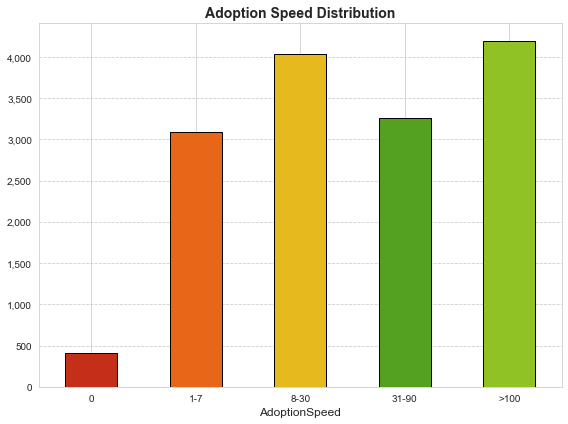

In [52]:
# Crear un histograma de barras con colores personalizados
colors = ['#C42F1A', '#E76618', '#E6B91E', '#54A021', '#90C226']
plt.figure(figsize=(8, 6))
data_EDA['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar', color=colors, edgecolor='black')

# Establecer etiquetas y títulos
plt.xlabel('AdoptionSpeed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Adoption Speed Distribution', fontsize=14, fontweight='bold')

# Eliminar título del eje y
plt.gca().set(ylabel=None)

# Mostrar los valores del eje y con separadores de miles
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

# Personalizar el estilo del gráfico
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')


# Ajustar el diseño general
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


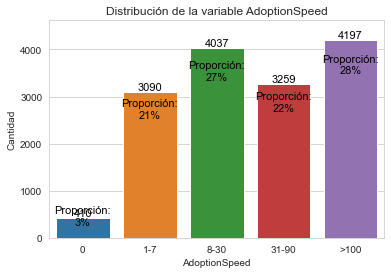

In [51]:
sns.set_style("whitegrid")

a = sns.countplot(data=data_EDA, x = "AdoptionSpeed")
a.set(ylabel = "Cantidad", title = "Distribución de la variable AdoptionSpeed", ylim = (0, max(data_EDA.AdoptionSpeed.value_counts())*1.1))

for ax in a.patches:
  x, y = ax.get_xy()
  width = ax.get_width()
  height = ax.get_height()
  a.annotate("Proporción:\n" + f'{height/data_EDA.shape[0]*100:.0f}%', (x + width/2, y + 0.85*height),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
  a.annotate(f'{height:.0f}', (x + width/2, y + 1*height),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')

### Variable Type

Primero se analizará la variable type que indica si el animal es un perro o un gato.

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


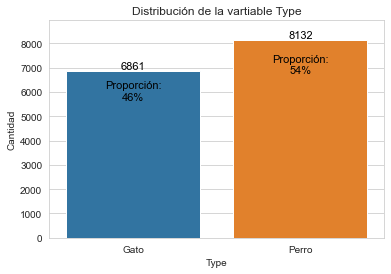

In [20]:
sns.set_style("whitegrid")

a = sns.countplot(data=data_EDA, x = "Type")
a.set(ylabel = "Cantidad", title = "Distribución de la variable Type", ylim = (0, max(data_EDA.Type.value_counts())*1.1))

for ax in a.patches:
  x, y = ax.get_xy()
  width = ax.get_width()
  height = ax.get_height()
  a.annotate("Proporción:\n" + f'{height/data_EDA.shape[0]*100:.0f}%', (x + width/2, y + 0.85*height),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
  a.annotate(f'{height:.0f}', (x + width/2, y + 1*height),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')


Como se puede ver en la gráfica hay un 8% más de perros que de gatos (aproximadamente 1271 más perros). Hay que tener en cuenta que lo que se está midiendo son observaciones en el dataset y algunas observaciones son grupos de mascotas que se adoptan en conjunto. Se analizará cómo es el tiempo de adopción de cada grupo cruzando esta variable también con el sexo del animal.

In [11]:
df_plot_1 = data_EDA.groupby(["Type"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_1 = df_plot_1.merge(data_EDA["Type"].value_counts(), how = "left", on = "Type")
df_plot_1["Porcentaje"] = df_plot_1.count_x / df_plot_1.count_y * 100

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")

a = sns.barplot(data=df_plot_1, x = "Type", y = "Porcentaje", hue = "AdoptionSpeed", saturation = 0.6)
a.legend(title="AdoptionSpeed",loc="center left",bbox_to_anchor=(1, 0.5))
a.set(ylabel = "Porcentaje", 
ylim = (0, max(df_plot_1.Porcentaje)*1.2),
title = "Velocidad de Adopción en función da la variable Type")


#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in a.patches:
    width = ax.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
    a.annotate(f'{height*data_EDA.Type.value_counts()[(z%2!=0)*1]/100:.0f}', (x + width/2, height/2),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    a.annotate(f'{round(height,2):.0f}%', (x + width/2, y + height + 3 - height/10),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

ValueError: cannot insert AdoptionSpeed, already exists

Se puede obsevar en la gráfica anterior cómo los perros tienden a tardar más en adoptarse, se puede ver cómo los valores de las categorías de mayor tiempo de adopción la cantidad de observaciones es mayor en los perros que en los gatos.

### Variable Gender

Type   VideoAmt
Gato   0           6596
       1            197
       2             47
       3             10
       4              5
       5              3
       6              3
Perro  0           7823
       1            220
       2             45
       3             26
       4             10
       5              4
       8              2
       6              1
       7              1
Name: VideoAmt, dtype: int64

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\4027769444.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

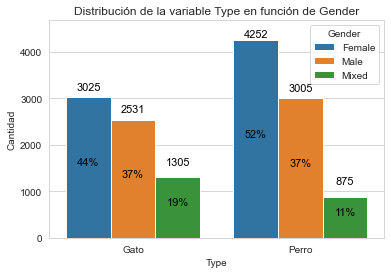

In [22]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")

a = sns.countplot(data=data_EDA, x = "Type", hue = "Gender")
a.legend(title="Gender")
a.set(ylabel = "Cantidad", 
ylim = (0, max(data_EDA.groupby(["Type", "Gender"])['AdoptionSpeed'].aggregate('count'))*1.1),
title = "Distribución de la variable Type en función de Gender")


#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in a.patches:
    width = ax.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
    a.annotate(f'{height:.0f}', (x + width/2, y + height + 300 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    a.annotate(f'{height/data_EDA.Type.value_counts()[(z%2==0)*1]*100:.0f}%', (x + width/2, height/2),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1


En este gráfico se puede observar que tanto en los perros como en los gatos hay mayor cantidad de hembras. También se descata que hay más "grupos familiares" de gatos que de perros.
Ahora se cruzarán estas variables con la velocidad con la que se adoptaron los animales.

In [71]:
df_plot = data_EDA.copy()
df_plot["Cantidades"] = data_EDA.AdoptionSpeed
df_plot = df_plot.groupby(['Type', 'MaturitySize', 'Gender', 'AdoptionSpeed'])['Cantidades'].aggregate('count').reset_index()
total_plot = data_EDA.copy()
total_plot["Totales"] = data_EDA.AdoptionSpeed
total_plot = total_plot.groupby(['Type', 'MaturitySize', 'Gender'])['Totales'].aggregate('count').reset_index()
df_plot["Totales"] = df_plot.merge(total_plot, how="left", on = ['Type', 'MaturitySize', 'Gender'])["Totales"]
df_plot["Frecuencia"] = round(df_plot.Cantidades / df_plot.Totales * 100)
df_plot["Porcentaje_acumulado"] = df_plot.groupby(['Type', 'MaturitySize', 'Gender'])["Frecuencia"].cumsum()

total_plot_2 = total_plot.groupby(['Type', 'MaturitySize'])['Totales'].aggregate('sum').reset_index()
total_plot_2["Porcentaje"] = round(100 * total_plot_2['Totales'] / total_plot_2.groupby('Type')['Totales'].transform('sum'))
total_plot_3 = df_plot.groupby(['Type', 'Gender','AdoptionSpeed'])['Cantidades'].aggregate('sum').reset_index()
total_plot_3["Porcentaje"] = round(100 * total_plot_3['Cantidades'] / total_plot_3.groupby(['Type', 'Gender'])['Cantidades'].transform('sum'))
total_plot_4 = total_plot_3.groupby(['Type', 'Gender'])['Cantidades'].aggregate('sum').reset_index()
total_plot_4["Porcentaje"] = round(100 * total_plot_4['Cantidades'] / total_plot_4.groupby(['Type'])['Cantidades'].transform('sum'))

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

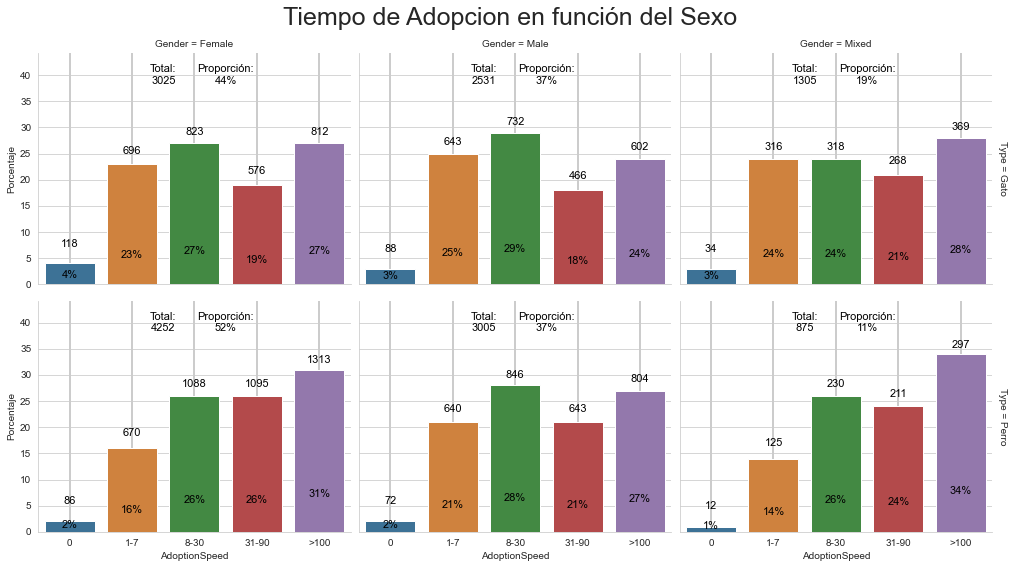

In [24]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = total_plot_3,
                  row = 'Type', col='Gender',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(total_plot_3.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función del Sexo", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{total_plot_4.Cantidades[z]:.0f}', (1.5, max(total_plot_3.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{total_plot_4.Porcentaje[z]:.0f}%', (2.5, max(total_plot_3.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{total_plot_3.Cantidades[w + z * 5]:.0f}', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
       

En el gráfico anterior se muestran quéla proporción de observaciones para la variable velocidad de adopción según el sexo del animal y el tipo de animal.
Se apreciar cómo los gatos tienden a adoptarse antes que los perros. Además en los perros hay una preferencia por adoptar perros machos, algo que no se puede asegurar en los gatos.

### Tamaño de Adulto

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

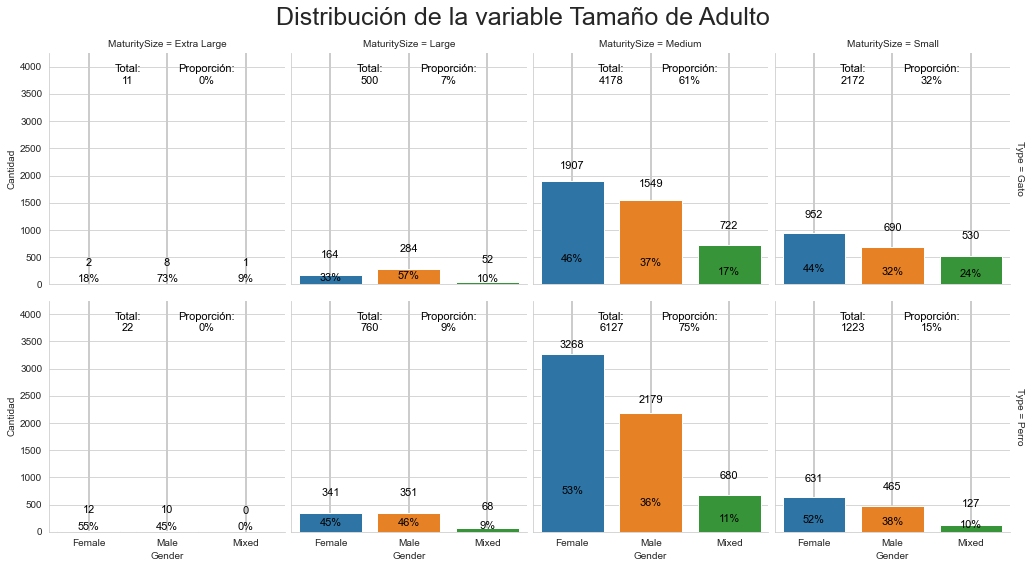

In [25]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = total_plot,
                  row = 'Type', col='MaturitySize',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='Gender', y = 'Totales', dodge = True,
               saturation = 0.8, palette = sns.color_palette())

g.set(ylabel = "Cantidad", ylim = (0, max(total_plot.Totales)*1.3))
g.fig.suptitle("Distribución de la variable Tamaño de Adulto", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{total_plot_2.Totales[z]:.0f}', (0.5, max(total_plot.Totales)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{total_plot_2.Porcentaje[z]:.0f}%', (1.5, max(total_plot.Totales)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}', (x + width/2, y + height + 300 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height/total_plot_2.Totales[z]*100:.0f}%', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

La cantidad de animales de tamaño extra grande no llega al 1% y la cantidad de tamaño grande no llega al 10%.  Los animales en su gran mayoría (60% en gatos y 75% en perros) son de tamaño madiano. También se puede asegurar que la gran mayoría de los perros son de tamaño mediano, y que hay más gatos de tamaño pequeño que perros pequeños.

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

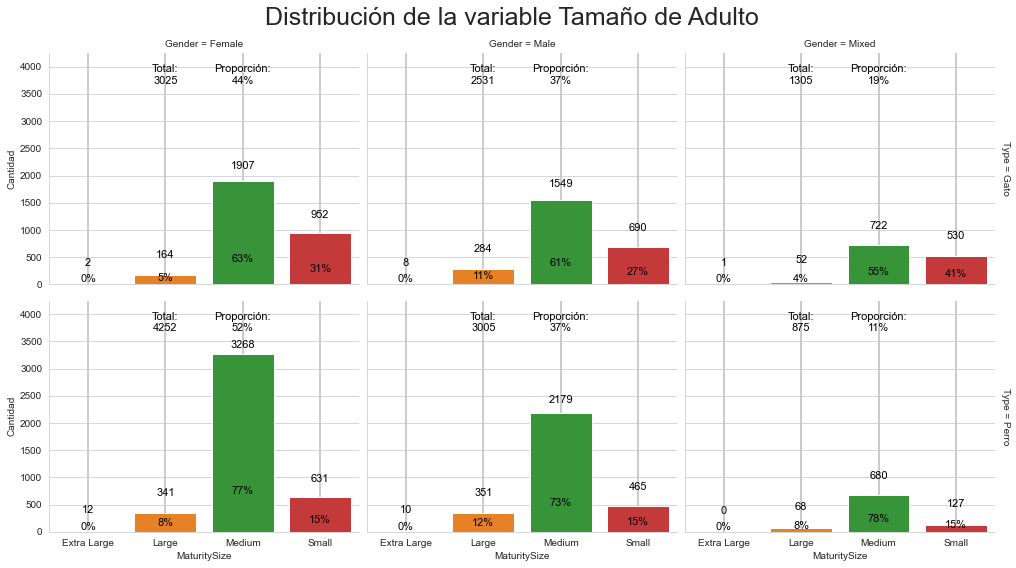

In [26]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = total_plot,
                  row = 'Type', col='Gender',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='MaturitySize', y = 'Totales', dodge = True,
               saturation = 0.8, palette = sns.color_palette())
g.set(ylabel = "Cantidad", ylim = (0, max(total_plot.Totales)*1.3))
g.fig.suptitle("Distribución de la variable Tamaño de Adulto", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{total_plot_4.Cantidades[z]:.0f}', (1, max(total_plot.Totales)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{total_plot_4.Porcentaje[z]:.0f}%', (2, max(total_plot.Totales)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}', (x + width/2, y + height + 300 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height/total_plot_4.Cantidades[z]*100:.0f}%', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

En el último gráfico se puede apreciar la mayor cantidad de hembras en el dataset y que predomina en ambos animales el tamaño mediano.
A continuación se vicularán estas variables con el tiempo de adopción.

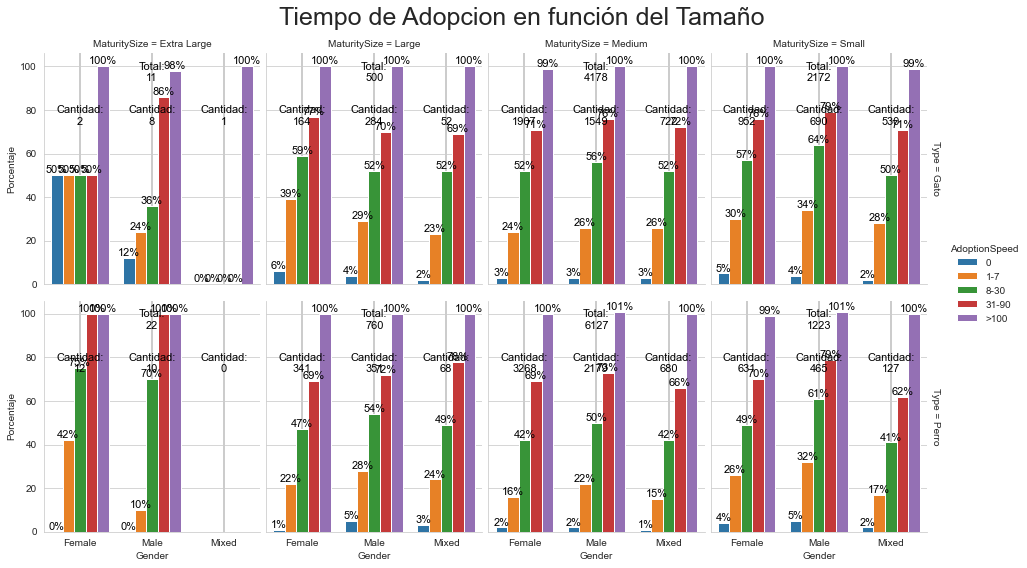

In [72]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot,
                  row = 'Type', col='MaturitySize',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='Gender', y = 'Porcentaje_acumulado', dodge = True,
                hue = 'AdoptionSpeed', saturation = 0.8, palette = sns.color_palette(), estimator = np.mean)
g.add_legend(title="AdoptionSpeed")
g.set(ylabel = "Porcentaje")
g.fig.suptitle("Tiempo de Adopcion en función del Tamaño", size = 25 )
g.tight_layout()
g.legend.set_visible(True)
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.xaxis.set_major_locator(FixedLocator([0.5, 1.5, 2.5]))
    #ax.set_xticks([0, 1, 2])
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{total_plot_2.Totales[z]:.0f}', (1, 95),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    j = 0
    for i in df_plot.Gender.unique():
      ax.annotate("Cantidad:\n" + f'{total_plot.Totales[j + z * 3]:.0f}', (j, 75),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
      j = j + 1
    z = z + 1
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')



El gráfico se vuelve difícil de leer por lo tanto se irá gráfico por gráfico.
Comenzaremos por los **perros**.
- Extra grande: Hay muy pocas observaciones, son todas observaciones de 1 solo perro. Las hembras tienden a adoptarse primero, demoran algo más los machos.
- Grande: Los machos tienden a adoptarse antes que las hembras. En los grupos de perros ("Mixed") se mantiene algo pareja la distribución, se adopta un mayor pocentaje de perros antes de los 90 días que en los otros grupos.
- Mediano: Es el grupo que más obseraviones de perros tiene. Tanto en las hembras como en los machos, se demora algo más en adoptarse respecto a los perros de tamaño grande (más marcado en las hembras). Esto se aprecia también en Mixed.
- Chico: De los perros machos, el tamaño chico es el que más rápido se adopta. Ocurre lo mismo en el hembras, aunque menos marcado. En el grupo Mixed es dónde más tiempo se demoran en adoptarlos. Esto último se podría vincular a que se adoptan perros chicos para estacios reducidos y por lo tanto se quiere adoptar solo 1 y no un grupo de animales.
En resumen, hay una preferencia por los perros chicos cuando se debe adoptar 1 solo perro. Cuando se trata de un grupo de perros se prefieren adoptar perros grandes. En cuanto al sexo de los perros, hay una leve tendencia a adoptar machos.

Ahora se analizarán los **gatos**.
- Exrtra grande: Al igual que en los perros hay muy pocas obseraciones. A los pocos que hay se les hace difícil de adoptar.
- Grande: Hay una preferencia por adoptar hembras.
- Mediano: La preferencia por las hembras parace equipararse con la de los machos. En los grupos de gatos se manteniene relativamente constante entre gatos grandes y medianos
- Chico: Hay una preferencia por los gatos machos, y es en el tamaño en el que más se adoptan los grupos de gatos.
En resumen, cuando los gatos son grandes se prefieren las hembras y cuando los gatos son chicos se prefieren los machos. Los grupos de gatos se mantiene relativamente constante.

En este gráfico se aprecia como en todas las categorias y sexos, los gatos se adoptan más rápidos que los perros, lo que marca una tendencia independientemente del sexo o tamaño.

### Raza
Se creará una nueva variable en el dataset indicando si el animal es de raza pura o cruza. Se analizará a continuación.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\812278521.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_5 = data_EDA.groupby(["Type"])["Tipo_Raza"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a 

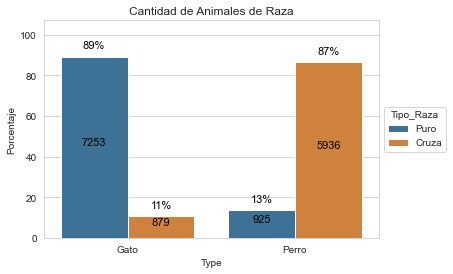

In [28]:
df_plot_5 = data_EDA.groupby(["Type"])["Tipo_Raza"].value_counts().reset_index().copy()
df_plot_5 = df_plot_5.merge(data_EDA["Type"].value_counts(), how = "left", on = "Type")
df_plot_5["Porcentaje"] = df_plot_5.count_x / df_plot_5.count_y * 100

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")

a = sns.barplot(data=df_plot_5, x = "Type", y = "Porcentaje", hue = "Tipo_Raza", saturation = 0.6)
a.legend(title="Tipo_Raza",loc="center left",bbox_to_anchor=(1, 0.5))
a.set(ylabel = "Porcentaje", 
ylim = (0, max(df_plot_5.Porcentaje)*1.2),
title = "Cantidad de Animales de Raza")


#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in a.patches:
    width = ax.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
    a.annotate(f'{height*data_EDA.Type.value_counts()[(z%2!=0)*1]/100:.0f}', (x + width/2, height/2),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    a.annotate(f'{round(height,2):.0f}%', (x + width/2, y + height + 3),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

Se puede observar que la gran cantidad de perros son cruza y que la gran cantidad de gatos no. Esto se debe a que la mayoría de los gatos son de raza "Domestica".
Qué quiere decir esto? Se los conoce popularmente como, por ejemplo, "gato doméstico europeo". Debido al escazo conocimiento que tiene en el tema es difícil tomar una decisión sobre si considerarlo cruza o no, ya que es un tipo de gato identificable y con razgos característicos. Es por este motivo que se decidió dejarlo como gato de "raza".
Una tabla a continuación para ilustrar lo mencionado en el párrafo anterior.

In [29]:
data_EDA.loc[data_EDA["Type"] == "Gato", "Breed1"].value_counts().reset_index().head(10)

,Breed1,count
0,Domestic,5188
1,Tabby,342
2,Siamese,264
3,Persian,221
4,Calico,105
5,American Shorthair,94
6,Oriental,90
7,Bengal,71
8,Tuxedo,56
9,Tortoiseshell,42


Ahora se analizará el tiempo de adopción en función de si se es de raza o no.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\3695061576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_6 = data_EDA.groupby(["Type","Tipo_Raza"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\3695061576.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_6["Porcentaje"] = df_plot_6["count"] / df_plot_6.groupby(["Type","Tipo_Raza"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\3695061576.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

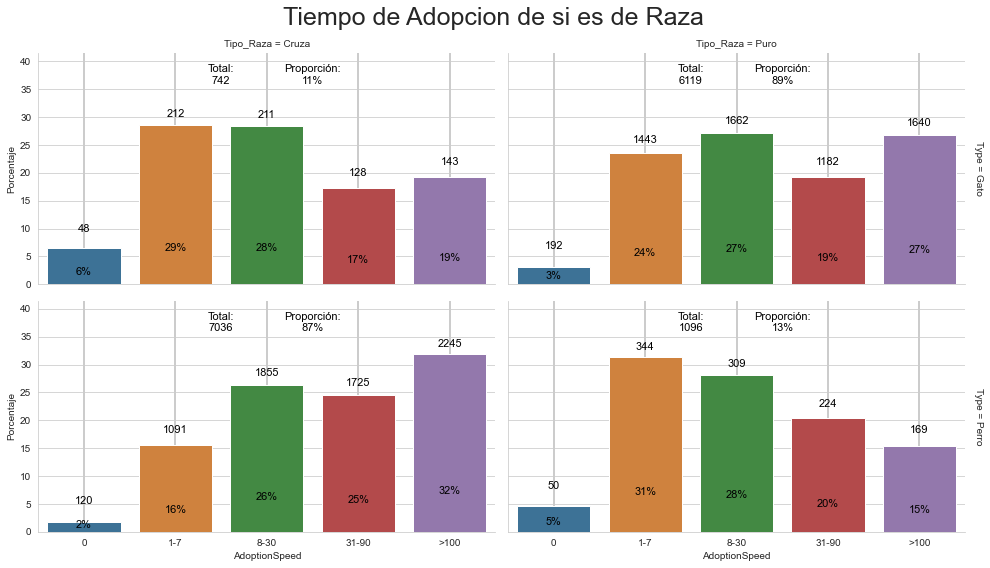

In [30]:
df_plot_6 = data_EDA.groupby(["Type","Tipo_Raza"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_6["Porcentaje"] = df_plot_6["count"] / df_plot_6.groupby(["Type","Tipo_Raza"])["count"].transform("sum") * 100
df_plot_6 = df_plot_6.sort_values(["Type","Tipo_Raza", "AdoptionSpeed"]).reset_index()
df_plot_7 = data_EDA.groupby(["Type"])["Tipo_Raza"].value_counts().reset_index().copy()
df_plot_7["Porcentaje"] = df_plot_7["count"] / df_plot_7.groupby(["Type"])["count"].transform("sum") * 100
df_plot_7 = df_plot_7.sort_values(["Type","Tipo_Raza"]).reset_index()


sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_6,
                  row = 'Type', col='Tipo_Raza',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_6.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion de si es de Raza", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_7["count"][z]:.0f}', (1.5, max(df_plot_6.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_7.Porcentaje[z]:.0f}%', (2.5, max(df_plot_6.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_7["count"][z] / 100):.0f}', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
       

Es marcada la diferencia entre perros y gatos la velocidad de adopción en función de si el animal es de raza o no. Mientras que varía muy poco en los gatos, con una tendencia a adoptar más rápido a gatos que no son de raza; en los perros influye mucho, ya que los perros de raza tienen a adoptarse antes.
Sería muy útil para este análizar poder categorizar las razas según cualidades características, pero esto no se hará debido a que se necesitan mayores conocimiento sobre el comportamiento y las características físicas de cada raza.
Ahora se analizará que sucede si las razas de gatos "domesticas" y "oriental" son sacadas del estudio.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\3140454483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_6 = data_EDA.loc[data_EDA["Breed1"] != "Domestic"].groupby(["Type","Tipo_Raza"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\3140454483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_6["Porcentaje"] = df_plot_6["count"] / df_plot_6.groupby(["Type","Tipo_Raza"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\3140454483.py:4: FutureWarning: The default of observed=False is deprecated and

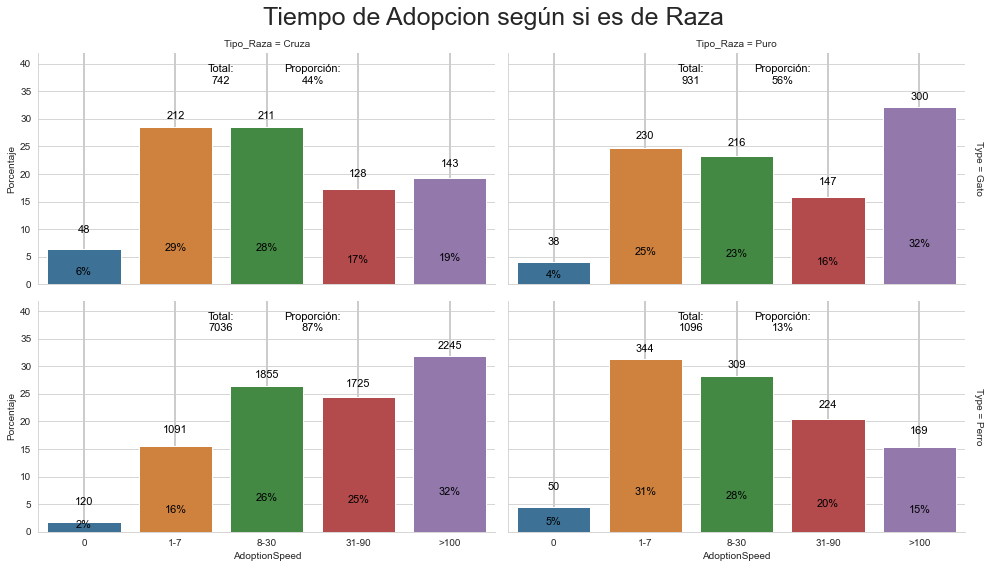

In [31]:
df_plot_6 = data_EDA.loc[data_EDA["Breed1"] != "Domestic"].groupby(["Type","Tipo_Raza"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_6["Porcentaje"] = df_plot_6["count"] / df_plot_6.groupby(["Type","Tipo_Raza"])["count"].transform("sum") * 100
df_plot_6 = df_plot_6.sort_values(["Type","Tipo_Raza", "AdoptionSpeed"]).reset_index()
df_plot_7 = data_EDA.loc[data_EDA["Breed1"] != "Domestic"].groupby(["Type"])["Tipo_Raza"].value_counts().reset_index().copy()
df_plot_7["Porcentaje"] = df_plot_7["count"] / df_plot_7.groupby(["Type"])["count"].transform("sum") * 100
df_plot_7 = df_plot_7.sort_values(["Type","Tipo_Raza"]).reset_index()


sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_6,
                  row = 'Type', col='Tipo_Raza',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_6.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion según si es de Raza", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_7["count"][z]:.0f}', (1.5, max(df_plot_6.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_7.Porcentaje[z]:.0f}%', (2.5, max(df_plot_6.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_7["count"][z] / 100):.0f}', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
       

Hay reducción abrupta de la cantidad de gatos de raza y se equiparan prácticamente con los gatos que son cruza. Ahora, el retirar a los gatos domésticos no influye demasiado en los tiempos de adoptción; solo aumentan levemente.
Se puede llegar a la conclusión que la raza del animal influye mucho más en los perros que en los gatos.

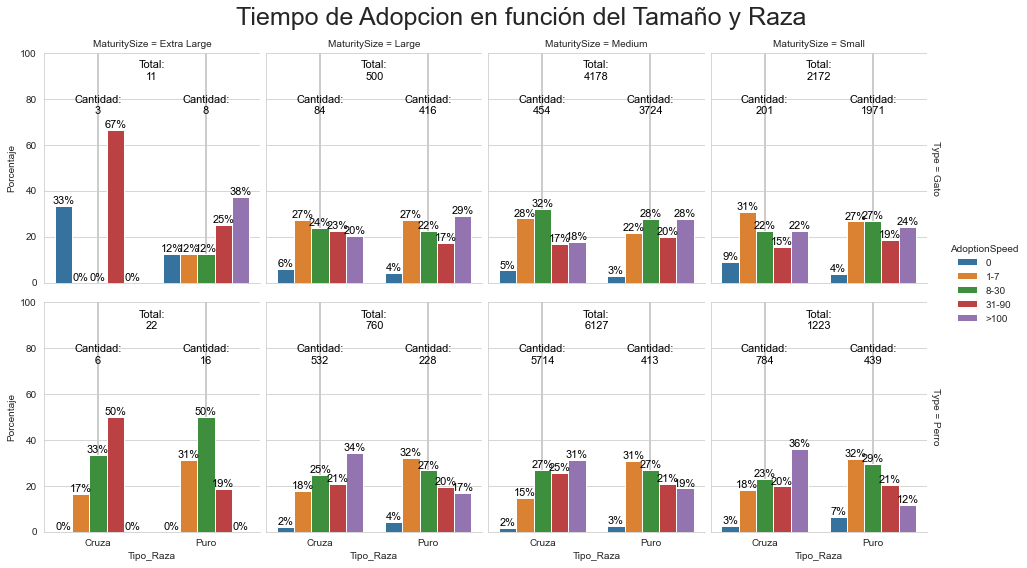

In [13]:
df_plot_8 = data_EDA.groupby(['Type', 'MaturitySize', 'Tipo_Raza'])["AdoptionSpeed"].value_counts().reset_index(name = "count")
df_plot_8["Porcentaje"] = df_plot_8["count"] / df_plot_8.groupby(["Type","MaturitySize", "Tipo_Raza"])["count"].transform("sum") * 100
df_plot_8 = df_plot_8.sort_values(["Type","MaturitySize","Tipo_Raza", "AdoptionSpeed"]).reset_index()
df_plot_9 = data_EDA.groupby(["Type","MaturitySize"])["Tipo_Raza"].value_counts().reset_index(name = "count")
df_plot_9["Porcentaje"] = df_plot_8["count"] / df_plot_8.groupby(["Type"])["count"].transform("sum") * 100
df_plot_9 = df_plot_9.sort_values(["Type", "MaturitySize", "Tipo_Raza"]).reset_index()
df_plot_10 = df_plot_9.groupby(['Type', 'MaturitySize'])["count"].aggregate("sum").reset_index()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_8,
                  row = 'Type', col='MaturitySize',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='Tipo_Raza', y = 'Porcentaje', dodge = True,
                hue = 'AdoptionSpeed', saturation = 0.7, palette = sns.color_palette(), estimator = np.mean)
g.add_legend(title="AdoptionSpeed")
g.set(ylabel = "Porcentaje",  ylim = (0, 100))
g.fig.suptitle("Tiempo de Adopcion en función del Tamaño y Raza", size = 25 )
g.tight_layout()
g.legend.set_visible(True)
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.xaxis.set_major_locator(FixedLocator([0.5, 1.5, 2.5]))
    #ax.set_xticks([0, 1, 2])
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_10["count"][z]:.0f}', (0.5, 90),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    j = 0
    for i in df_plot_8.Tipo_Raza.unique():
      ax.annotate("Cantidad:\n" + f'{df_plot_9["count"][j + z * 2]:.0f}', (j, 75),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
      j = j + 1
    z = z + 1
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')


Nuevamente se comenzará por los **perros**.
- Extra grande: Son en su mayoría perros de raza, que se adoptan relativamente rápido. Igualmente la muestra es muy pequeña para sacar conclusiones.
- Grande: Mayor cantidad de perros que no son de raza, aunque este grupo tiene mayor tiempo hasta que sean adoptados. Nuevamente se comprueba la influencia de la raza en los perros.
- Mediano: Gran cantidad de perros cruza, nuevamente con un mayor tiempo de adopción.
- Pequeños: En los perros pequeños se equipara un poco la cantidad de perros de raza con los que no son de raza en este grupo Sigue habiendo una diferencia en los tiempos de adopción de si son de raza o no. En los perros pequeños parece influir mpas esto que en los otros grupos.
Ahora es el turno de los **gatos**. 
- Extra grande: La mayoría de los gatos muy grandes son de raza. En general no son gatos que se adopten rápidamente, pero al tener una muestra muy pequeña es difícil sacar conclusiones
- Grande: Nuevamente son en su mayoría perros de raza (de esperarse dado lo desbalanceada que está el dataset en la variable Tipo_Raza), los gatos que no son de raza se adoptan antes, aunque con una muy leve diferencia.
- Mediano: En los gatos medianos se adoptan más rápido los gatos que son de raza.
- Pequeño: Continúa habiendo una inclinación a adoptar gatos de raza por sobre los gatos que no son de raza.

En conclusión hay una marcada tendencia a adoptar perros de raza, sin importar el tamaño del mismo (en todos los tamaños las 2 categorías de adopción más rápida superan el 30% del total de perros). En los gatos esto no es tan marcado, aunque hay una leve inclinación a adoptar gatos de raza en los tamaños mediano y pequeño. Comparando entre los perros y los gatos se podría decir que los perros de raza se adoptan prácticamente tan rápido como los gatos; los perros que no son de raza son los que bajan en promedio la velocidad de adopción de los perros haciendo que esta sea en promedio mayor respecto a los gatos.

Cuando se analice el estado de salud de los animales se tendrá mayor certeza sobre porqué puede estar sucediendo esto.

### Variable FurLength

Se analizará a continuación la influencia del largo del pelaje del animal en la velocidad de adopción.
Primero se analizará cómo esta distribuida esta variable entre perros y gatos.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\113991212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_11 = data_EDA.groupby(["Type"])["FurLength"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a

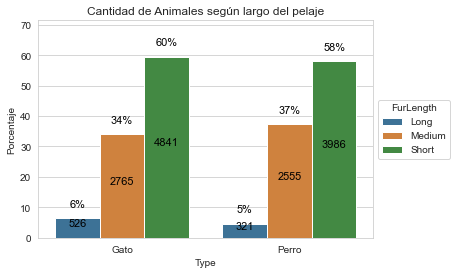

In [33]:
df_plot_11 = data_EDA.groupby(["Type"])["FurLength"].value_counts().reset_index().copy()
df_plot_11 = df_plot_11.merge(data_EDA["Type"].value_counts(), how = "left", on = "Type")
df_plot_11["Porcentaje"] = df_plot_11.count_x / df_plot_11.count_y * 100

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")

a = sns.barplot(data=df_plot_11, x = "Type", y = "Porcentaje", hue = "FurLength", saturation = 0.6)
a.legend(title="FurLength",loc="center left",bbox_to_anchor=(1, 0.5))
a.set(ylabel = "Porcentaje", 
ylim = (0, max(df_plot_11.Porcentaje)*1.2),
title = "Cantidad de Animales según largo del pelaje")


#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in a.patches:
    width = ax.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
    a.annotate(f'{height*data_EDA.Type.value_counts()[(z%2!=0)*1]/100:.0f}', (x + width/2, height/2),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    a.annotate(f'{round(height,2):.0f}%', (x + width/2, y + height + 3),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

El largo del pelaje en los animales se distribuye de forma muy similar tanto en perros como en gatos, con una gran mayoría de pelo corto.
Se analizará a continuación esta distribución junto con el tamaño del animal, ya que estas variables pueden estar muy relacionadas por la raza.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\166752014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_12 = data_EDA.groupby(["Type","FurLength"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\166752014.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_12["Porcentaje"] = df_plot_12["count"] / df_plot_12.groupby(["Type","FurLength"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\166752014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

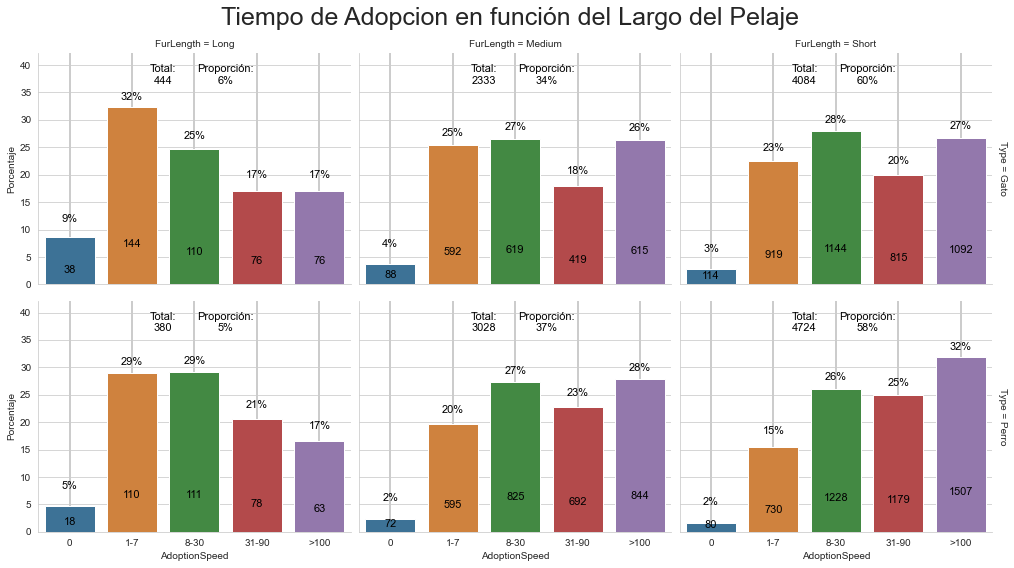

In [34]:
df_plot_12 = data_EDA.groupby(["Type","FurLength"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_12["Porcentaje"] = df_plot_12["count"] / df_plot_12.groupby(["Type","FurLength"])["count"].transform("sum") * 100
df_plot_12 = df_plot_12.sort_values(["Type","FurLength", "AdoptionSpeed"]).reset_index()
df_plot_13 = data_EDA.groupby(["Type"])["FurLength"].value_counts().reset_index().copy()
df_plot_13["Porcentaje"] = df_plot_13["count"] / df_plot_13.groupby(["Type"])["count"].transform("sum") * 100
df_plot_13 = df_plot_13.sort_values(["Type","FurLength"]).reset_index()


sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_12,
                  row = 'Type', col='FurLength',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_12.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función del Largo del Pelaje", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_13["count"][z]:.0f}', (1.5, max(df_plot_12.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_13.Porcentaje[z]:.0f}%', (2.5, max(df_plot_12.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_13["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

Hay una preferencia por animales de pelo largo por sobre los animales de pelo corto, en especial en los perros. Esto puede es vinculado también a la raza y tamaño del animal, por lo tanto, se analizarán los tiempos de adopción en función del largo del pelaje y el tamaño del animal.

In [67]:
df_plot_14 = data_EDA.groupby(['Type', 'MaturitySize', 'FurLength', 'AdoptionSpeed'])['Quantity'].aggregate('count').reset_index()
total_plot_5 = data_EDA.groupby(['Type', 'MaturitySize', 'FurLength'])['Quantity'].aggregate('count').reset_index()
df_plot_14["Totales"] = df_plot_14.merge(total_plot_5, how="left", on = ['Type', 'MaturitySize', 'FurLength'])['Quantity_y']
df_plot_14["Porcentaje"] = round(df_plot_14.Quantity / df_plot_14.Totales * 100)
total_plot_6 = total_plot_5.groupby(['Type', 'MaturitySize'])['Quantity'].aggregate('sum').reset_index()
total_plot_5["Totales"] = total_plot_5.merge(total_plot_6, how="left", on = ['Type', 'MaturitySize'])['Quantity_y']
total_plot_5["Porcentaje"] = round(100 * total_plot_5['Quantity'] / total_plot_5['Totales'])
total_plot_7 = total_plot_6.groupby(['Type'])['Quantity'].aggregate('sum').reset_index()
total_plot_6["Totales"] = total_plot_6.merge(total_plot_7, how="left", on = ['Type'])['Quantity_y']
total_plot_6["Porcentaje"] = round(100 * total_plot_6['Quantity'] / total_plot_6['Totales'])



sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = total_plot_5,
                  row = 'Type', col='MaturitySize',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='FurLength', y = 'Porcentaje', dodge = True,
               saturation = 0.8, palette = sns.color_palette())
g.set(ylabel = "Cantidad", ylim = (0, max(total_plot_5.Porcentaje)*1.3))
g.fig.suptitle("Distribución de la variable Largo del Pelaje", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{total_plot_6.Quantity[z]:.0f}', (1, max(total_plot_5.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{total_plot_6.Porcentaje[z]:.0f}%', (2, max(total_plot_5.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 0.02),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height*total_plot_6.Quantity[z]/100:.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

KeyError: 'Cantidad_colores'

En el último gréfico se puede ver que el pelo corto predomina en todos los tamaños. En los gatos se puede apreciar como a medida que aumenta el tamaño del gato, menor proporción de gatos de cabello corto hay, mientras que en los perros esta proporción se mantiene relativamente constante. También hay que tener en cuenta que hay muy pocos animales de tamaño extra grande, por lo que es difícil sacar conclusiones sobre esta categoría.

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

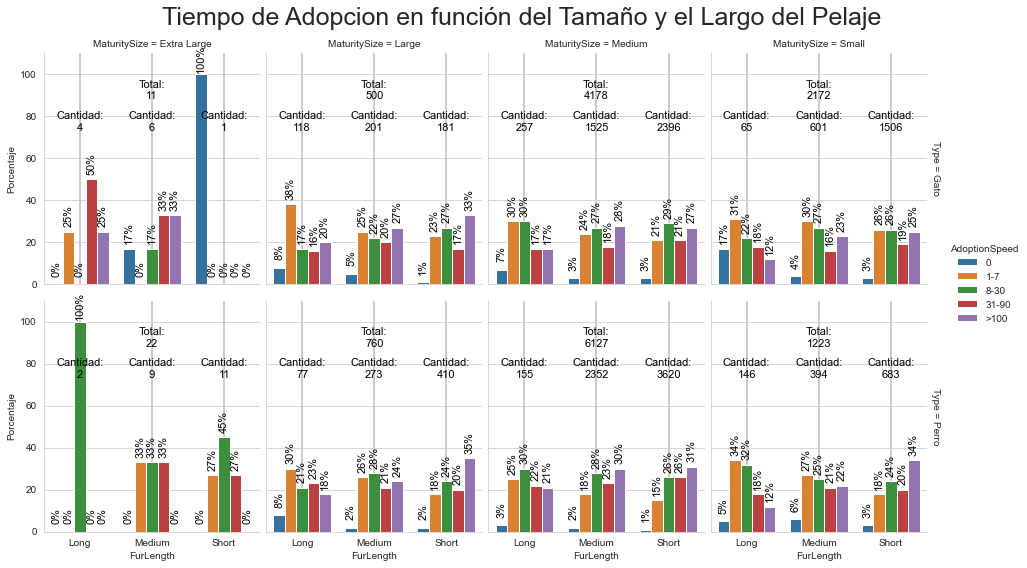

In [36]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_14,
                  row = 'Type', col='MaturitySize',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='FurLength', y = 'Porcentaje', dodge = True,
                hue = 'AdoptionSpeed', saturation = 0.7, palette = sns.color_palette(), estimator = np.mean)
g.add_legend(title="AdoptionSpeed")
g.set(ylabel = "Porcentaje",  ylim = (0, 110))
g.fig.suptitle("Tiempo de Adopcion en función del Tamaño y el Largo del Pelaje", size = 25 )
g.tight_layout()
g.legend.set_visible(True)
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.xaxis.set_major_locator(FixedLocator([0.5, 1.5, 2.5]))
    #ax.set_xticks([0, 1, 2])
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{total_plot_6["Quantity"][z]:.0f}', (1, 90),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    j = 0
    for i in total_plot_5.FurLength.unique():
      ax.annotate("Cantidad:\n" + f'{total_plot_5["Quantity"][j + z * 3]:.0f}', (j, 75),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
      j = j + 1
    z = z + 1
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 5),
                    ha='center', va='center', fontsize=11, rotation=90, color='black', xytext=(0, 5),
                    textcoords='offset points')


Se analizan primeros los **perros**.
- Extra Grande: Se adoptan a una "velocidad media", no se aprecia una gran diferencia en función del largo del pelaje en este grupo.
- Grande, Mediano y Chico: Se aprecia una preferencia por los perros de pelaje largo en todos lo tamaños. El comportamiento de la variable tiempo de adopción sigue el mismo patrón independientemente del tamaño del animal.

Se continúa con los **gatos**.
- Extra Grande: Muy poca cantidad de variables, no se pueden sacar muchas conclusiones. El único gato de pelaje corto se adoptó rápidamente, es sospechoso que solo haya 1 observación con estas características entre los más de 7000 gatos, ¿será una observación mal cargada?.
- Grande, Mediano y Chico: Se puede observar el mismo patrón que en los perros.

### Variable Color

A continuación se creará una nueva variable categóríca que indique la cantidad de colores que presenta el animal.

In [24]:
df_plot_15

,Type_x,Cantidad_colores,count,index,Type_y
0,Gato,2_Colores,2697,Gato,6861
1,Gato,3_Colores,2679,Gato,6861
2,Gato,1_Color,1485,Gato,6861
3,Perro,2_Colores,3436,Perro,8132
4,Perro,1_Color,2986,Perro,8132
5,Perro,3_Colores,1710,Perro,8132


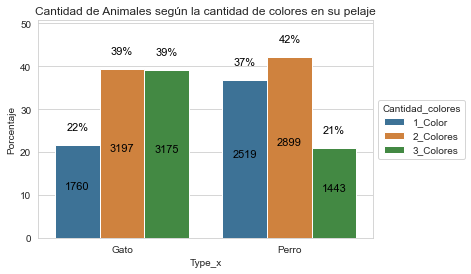

In [26]:
df_plot_15 = data_EDA.groupby(["Type"])["Cantidad_colores"].value_counts().reset_index(name = "count").copy()
df_plot_15 = df_plot_15.merge(data_EDA["Type"].value_counts().reset_index(), how = "left", left_on= "Type", right_on = "index")
df_plot_15["Porcentaje"] = df_plot_15["count"] / df_plot_15.Type_y * 100

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")

a = sns.barplot(data=df_plot_15, x = "Type_x", y = "Porcentaje", hue = "Cantidad_colores", saturation = 0.6)
a.legend(title="Cantidad_colores",loc="center left",bbox_to_anchor=(1, 0.5))
a.set(ylabel = "Porcentaje", 
ylim = (0, max(df_plot_15.Porcentaje)*1.2),
title = "Cantidad de Animales según la cantidad de colores en su pelaje")


#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in a.patches:
    width = ax.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
    a.annotate(f'{height*data_EDA.Type.value_counts()[(z%2!=0)*1]/100:.0f}', (x + width/2, height/2),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    a.annotate(f'{round(height,2):.0f}%', (x + width/2, y + height + 3),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

Los perros tienen a tener el pelaje de y solo color, mientras que los gatos tienen mayor cantidad de colores.
Se cruzará ahora estas variables con la velocidad de adopción.

In [62]:
a = df_plot_16.groupby(["Type","Cantidad_colores"])["Porcentaje"].cumsum()
print(a)

0       2.962963
1      29.158249
2      56.565657
3      73.602694
4     100.000000
5       3.967371
6      28.401928
7      55.320727
8      74.972191
9     100.000000
10      3.322135
11     25.979843
12     53.602090
13     73.273610
14    100.000000
15      2.277294
16     20.060281
17     45.010047
18     68.050904
19    100.000000
20      1.600698
21     19.353900
22     47.584400
23     72.788126
24    100.000000
25      2.748538
26     19.941520
27     46.198830
28     69.298246
29    100.000000
Name: Porcentaje, dtype: float64


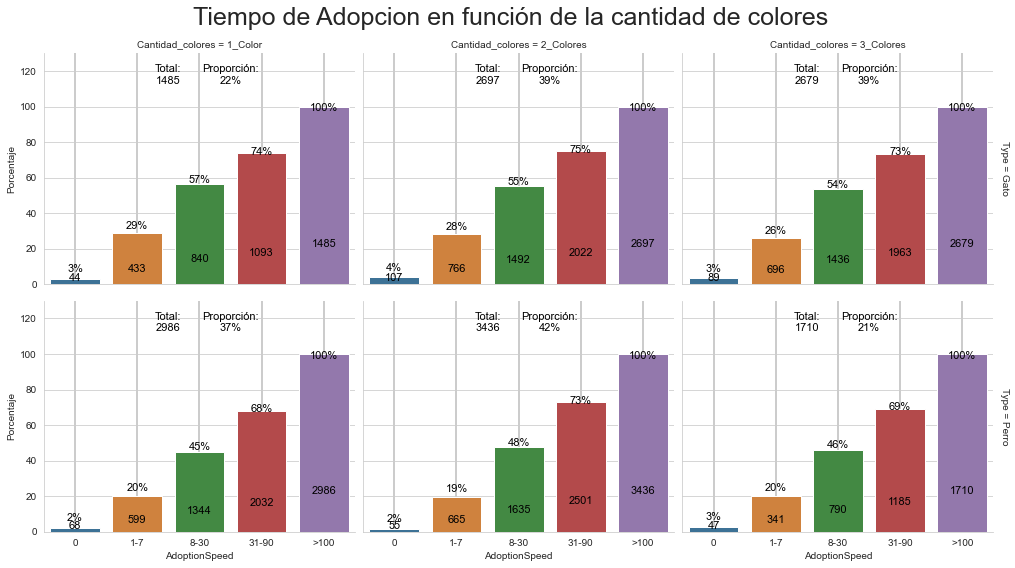

In [65]:
df_plot_16 = data_EDA.groupby(["Type","Cantidad_colores"])["AdoptionSpeed"].value_counts().reset_index(name = "count").copy()
df_plot_16["Porcentaje"] = df_plot_16["count"] / df_plot_16.groupby(["Type","Cantidad_colores"])["count"].transform("sum") * 100
df_plot_16 = df_plot_16.sort_values(["Type","Cantidad_colores", "AdoptionSpeed"]).reset_index()
df_plot_16["Porcentaje_acumulado"] = df_plot_16.groupby(["Type","Cantidad_colores"])["Porcentaje"].cumsum()
df_plot_17 = data_EDA.groupby(["Type"])["Cantidad_colores"].value_counts().reset_index(name = "count").copy()
df_plot_17["Porcentaje"] = df_plot_17["count"] / df_plot_17.groupby(["Type"])["count"].transform("sum") * 100
df_plot_17 = df_plot_17.sort_values(["Type","Cantidad_colores"]).reset_index()


sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_16,
                  row = 'Type', col='Cantidad_colores',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje_acumulado', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_16.Porcentaje_acumulado)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de la cantidad de colores", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_17["count"][z]:.0f}', (1.5, max(df_plot_16.Porcentaje_acumulado)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_17.Porcentaje[z]:.0f}%', (2.5, max(df_plot_16.Porcentaje_acumulado)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_17["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

Tanto en los gatos como en los perros el comportamiento de la variable velocidad de adopción es similar. Prácticamente no influye la cantidad de colores en el pelaje del animal.
se analizará si influye el color principal en la velocidad de adopción.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\2418542715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_18 = data_EDA.groupby(["Type","Color1"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\2418542715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_18["Porcentaje"] = df_plot_18["count"] / df_plot_18.groupby(["Type","Color1"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\2418542715.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

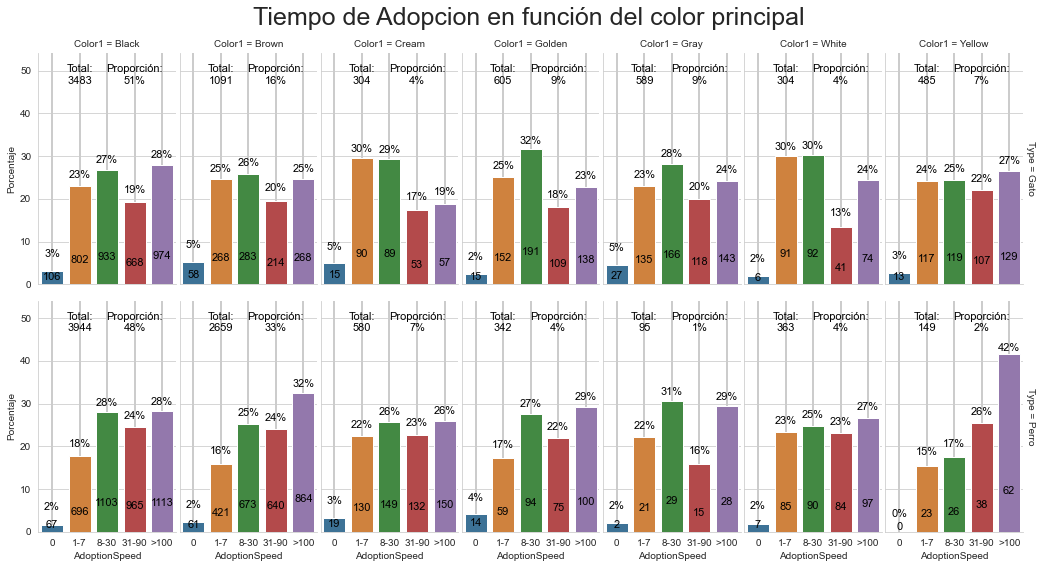

In [40]:
df_plot_18 = data_EDA.groupby(["Type","Color1"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_18["Porcentaje"] = df_plot_18["count"] / df_plot_18.groupby(["Type","Color1"])["count"].transform("sum") * 100
df_plot_18 = df_plot_18.sort_values(["Type","Color1", "AdoptionSpeed"]).reset_index()
df_plot_19 = data_EDA.groupby(["Type"])["Color1"].value_counts().reset_index().copy()
df_plot_19["Porcentaje"] = df_plot_19["count"] / df_plot_19.groupby(["Type"])["count"].transform("sum") * 100
df_plot_19 = df_plot_19.sort_values(["Type","Color1"]).reset_index()


sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_18,
                  row = 'Type', col='Color1',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_18.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función del color principal", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_19["count"][z]:.0f}', (1, max(df_plot_18.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_19.Porcentaje[z]:.0f}%', (3, max(df_plot_18.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_19["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

**Gatos**
- Más de la mitad de los gatos tienen color principal el negro (51%), seguido por el marrón (16%).
- Los gatos color crema son los que más rápido se adoptan, aunque esta diferencia de velocidad de adopción no es tan marcada.
- El resto de los colores se comportan bastante parecido, el color de gatos que más demora en adoptarse son los gatos negros, probablemente por la gran abundancia de los mismos.

**Perros**
- Casi la mitad de los perros tienen como color principal el negro (48%), seguido por el color marrón (33%). Entre ambos suman el 80% de todos los perros.
- Los perros que más demoran en adoptarse son los perros de color amarillo, esta tendencia es marcada por sobre los otros colores.
- El resto de los colores se comportan muy similar.

### Salud del Animal

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\124344092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_20 = data_EDA.groupby(["Type","Health"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\124344092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_20["Porcentaje"] = df_plot_20["count"] / df_plot_20.groupby(["Type","Health"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\124344092.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

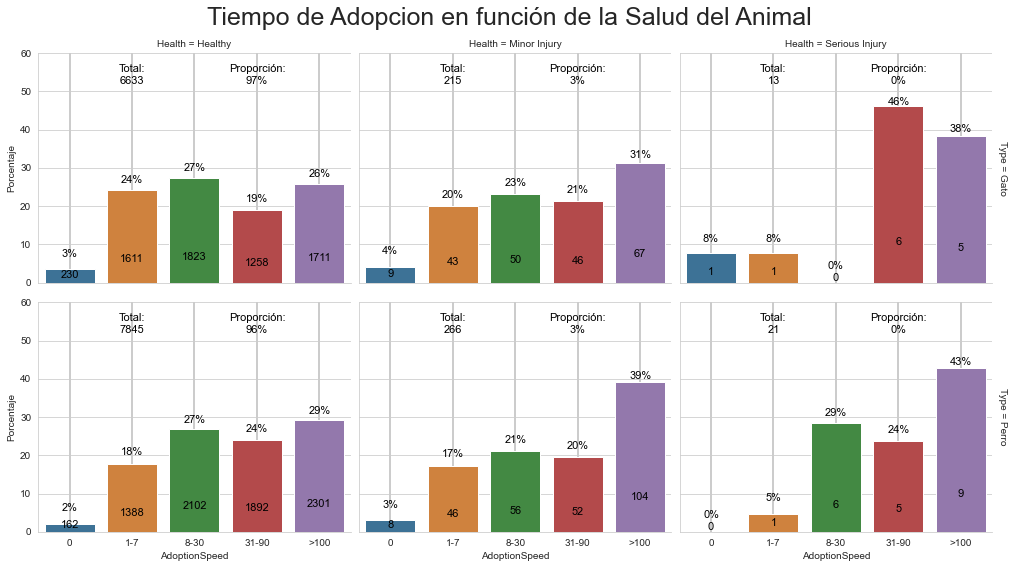

In [41]:
df_plot_20 = data_EDA.groupby(["Type","Health"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_20["Porcentaje"] = df_plot_20["count"] / df_plot_20.groupby(["Type","Health"])["count"].transform("sum") * 100
df_plot_20 = df_plot_20.sort_values(["Type","Health", "AdoptionSpeed"]).reset_index()
df_plot_21 = data_EDA.groupby(["Type"])["Health"].value_counts().reset_index().copy()
df_plot_21["Porcentaje"] = df_plot_21["count"] / df_plot_21.groupby(["Type"])["count"].transform("sum") * 100
df_plot_21 = df_plot_21.sort_values(["Type","Health"]).reset_index()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_20,
                  row = 'Type', col='Health',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_20.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de la Salud del Animal", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_21["count"][z]:.0f}', (1, max(df_plot_20.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_21.Porcentaje[z]:.0f}%', (3, max(df_plot_20.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_21["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

Es muy marcada la diferencia en la cantidad de animales sanos contra los animales enfermos, el 96% de los perros y gatos se encuentran sanos. El grupo de muy lastimados resulta difícil sacar conclusiones debido a la pequeña cantidad de observaciones.
Los animales con lastimaduras, aunque sean leves, tienen menor velocidad de adopción que los animales sanos; este comportamiento se aprecia en perros y gatos.

### Vacunación

Tiempos de adopción en función de si están vacunados o no.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\4023239756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_22 = data_EDA.groupby(["Type","Vaccinated"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\4023239756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_22["Porcentaje"] = df_plot_22["count"] / df_plot_22.groupby(["Type","Vaccinated"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\4023239756.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

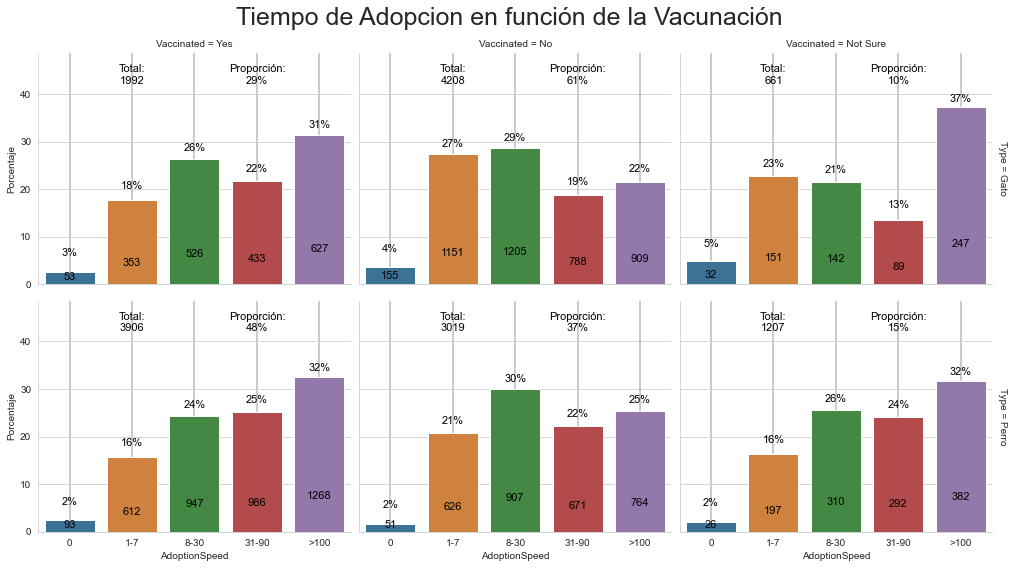

In [42]:
df_plot_22 = data_EDA.groupby(["Type","Vaccinated"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_22["Porcentaje"] = df_plot_22["count"] / df_plot_22.groupby(["Type","Vaccinated"])["count"].transform("sum") * 100
df_plot_22 = df_plot_22.sort_values(["Type","Vaccinated", "AdoptionSpeed"]).reset_index()
df_plot_23 = data_EDA.groupby(["Type"])["Vaccinated"].value_counts().reset_index().copy()
df_plot_23["Porcentaje"] = df_plot_23["count"] / df_plot_23.groupby(["Type"])["count"].transform("sum") * 100
df_plot_23 = df_plot_23.sort_values(["Type","Vaccinated"]).reset_index()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_22,
                  row = 'Type', col='Vaccinated',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_22.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de la Vacunación", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_23["count"][z]:.0f}', (1, max(df_plot_22.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_23.Porcentaje[z]:.0f}%', (3, max(df_plot_22.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_23["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

En los gatos, los que no se esta seguro de que hayan sido vacunados son los que más demoran en adoptarse; en los perros esto no se puede afirmar.
En el gráfico anterior se puede apreciar que hay perros vacunados en mayor proporción que gatos, pero en ambos casos los NO vacunados se adoptan más rápido que los vacunados. Tendrá que ver este comportamiento con la edad del animal? Se analizará en la siguiente gráfica.

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

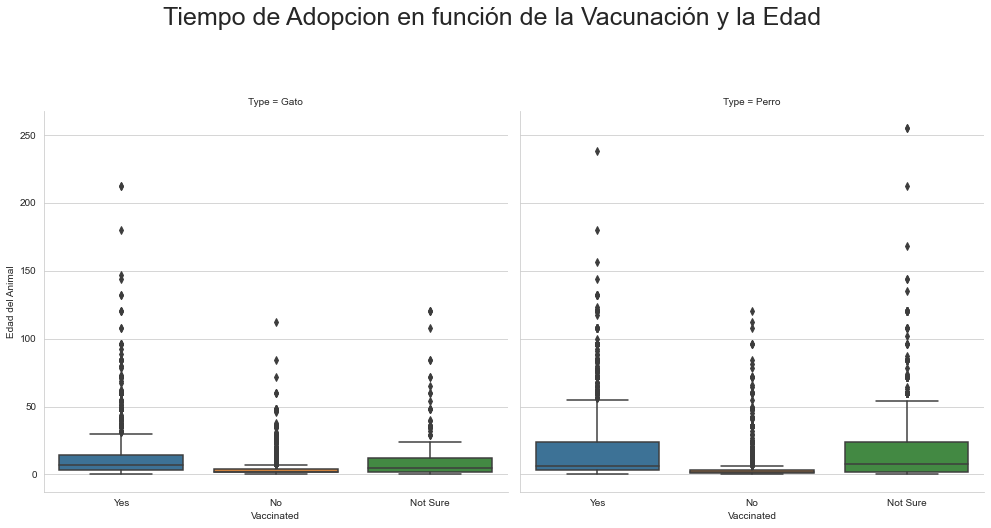

In [43]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = data_EDA,
                  col='Type',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.boxplot, x='Vaccinated', y = 'Age',
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Edad del Animal")
g.fig.suptitle("Tiempo de Adopcion en función de la Vacunación y la Edad", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

Como se puede ver en el boxplot, la edad de los no vacunados en promedio es menor que la de los vacunados, esto se puede apreciar entre los perros y los gatos. Por lo tanto, se sospecha que la preferencia en adoptar animales no vacunados se debe a la edad y no tanto a la vacunación, esto se analizará más adelante.

### Edad

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

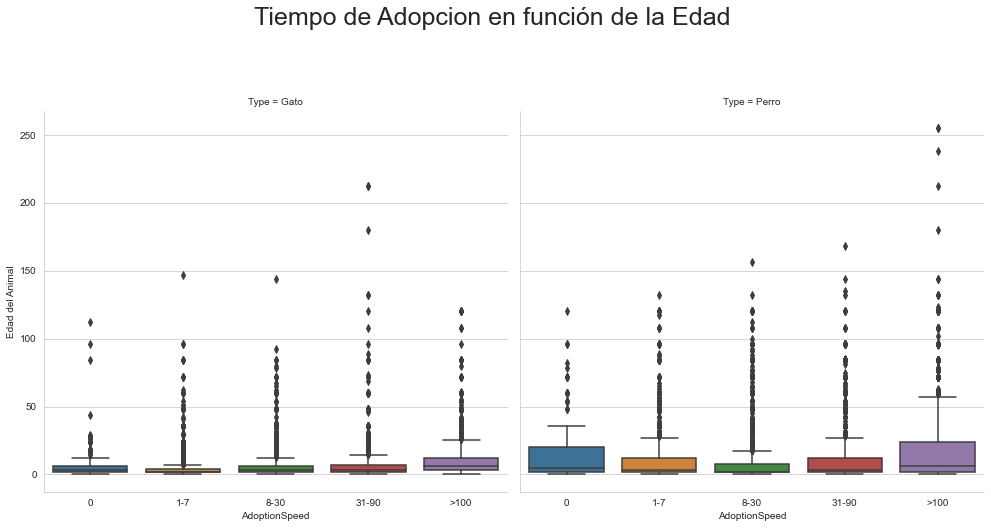

In [44]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = data_EDA,
                  col='Type', 
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.boxplot, x='AdoptionSpeed', y = 'Age',
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Edad del Animal")
g.fig.suptitle("Tiempo de Adopcion en función de la Edad", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

Se puede observar que en los gatos, los que más tiempo demoran en adoptarse son los gatos en promedio más adultos. En los perros no es tán así, sorprende la gran dispersión en las edades entre los que más rápido y más lento se adoptan en los perros.
Todas las categorías tienen una fuerte asimetría hacia la derrecha.

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

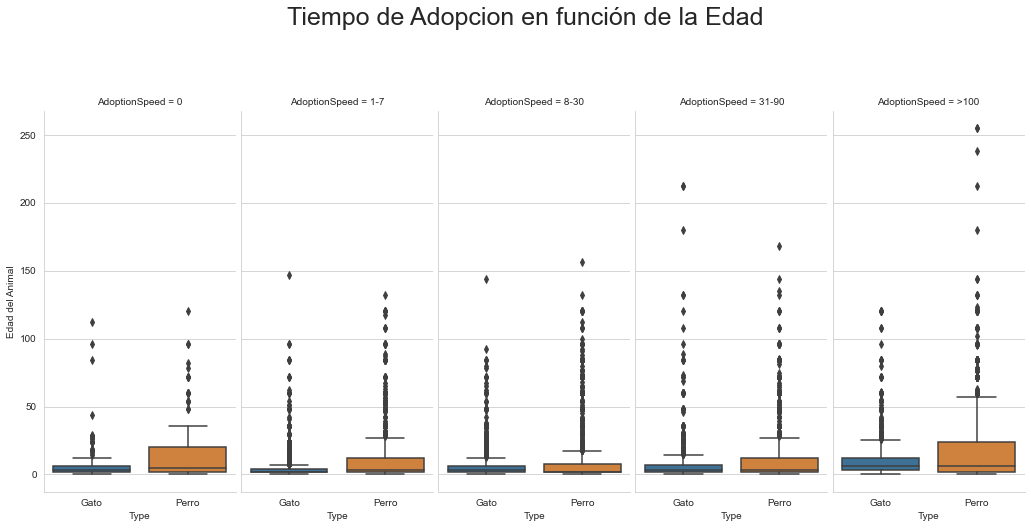

In [45]:
sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = data_EDA,
                  col='AdoptionSpeed', 
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.boxplot, x='Type', y = 'Age',
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Edad del Animal")
g.fig.suptitle("Tiempo de Adopcion en función de la Edad", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

Al igual que en el gráfico anterior se observa un mayor dispersión en la eda entre los perros que entre los gatos.
Entre los animales que más rápido se adoptan los gatos tienen promedio menor edad, mientras que entre los que más demoran en adoptarse, tienen un promedio más similar, aunque esto no se pueda definir por la gran escala del gráfico. Se estudiará directamente el promedio de la edad a continuación. 
En general la edad de los gatos parece en promedio ser menor que la de los perros, pero este se comprobará a continuación.

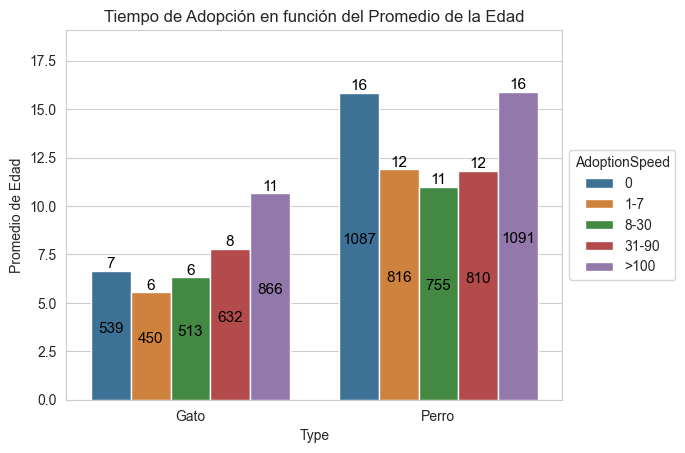

In [14]:
df_plot_24 = data_EDA.groupby(["Type", "AdoptionSpeed"])["Age"].mean().reset_index().copy()
#df_plot_24 = df_plot_15.merge(data_EDA["Type"].value_counts(), how = "left", on = "Type")
#df_plot_24["Porcentaje"] = df_plot_15.count_x / df_plot_15.count_y * 100

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")

a = sns.barplot(data=df_plot_24, x = "Type", y = "Age", hue = "AdoptionSpeed", saturation = 0.6)
a.legend(title="AdoptionSpeed",loc="center left",bbox_to_anchor=(1, 0.5))
a.set(ylabel = "Promedio de Edad", 
ylim = (0, max(df_plot_24.Age)*1.2),
title = "Tiempo de Adopción en función del Promedio de la Edad")


#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in a.patches:
    width = ax.get_width()
    height = ax.get_height()
    x, y = ax.get_xy()
    a.annotate(f'{height*data_EDA.Type.value_counts()[(z%2!=0)*1]/100:.0f}', (x + width/2, height/2),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    a.annotate(f'{round(height,2):.0f}', (x + width/2, y + height),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    z = z + 1

En el gráfico anterior se muestran los promedios de edad de los animales y su velocidad de adopción. Sorprende la diferencia en el promedio de edad entre los perros y los gatos, teniendo también en cuenta que los gatos generalmente viven más. Además en los gatos hay una correlación entre la edad y la velocidad de adopción que en los perros no es tan clara.
Posiblemente, debido a que los perros tienen a ser mas dañinos en el hogar, se prefieren perros adultos que ya son animales más tranquilos.

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\2301387268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_25 = data_EDA.groupby(["Type", "Vaccinated", "AdoptionSpeed"])["Age"].mean().reset_index()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\2301387268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_26 = data_EDA.groupby(["Type"])["Vaccinated"].value_counts().reset_index()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\2301387268.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

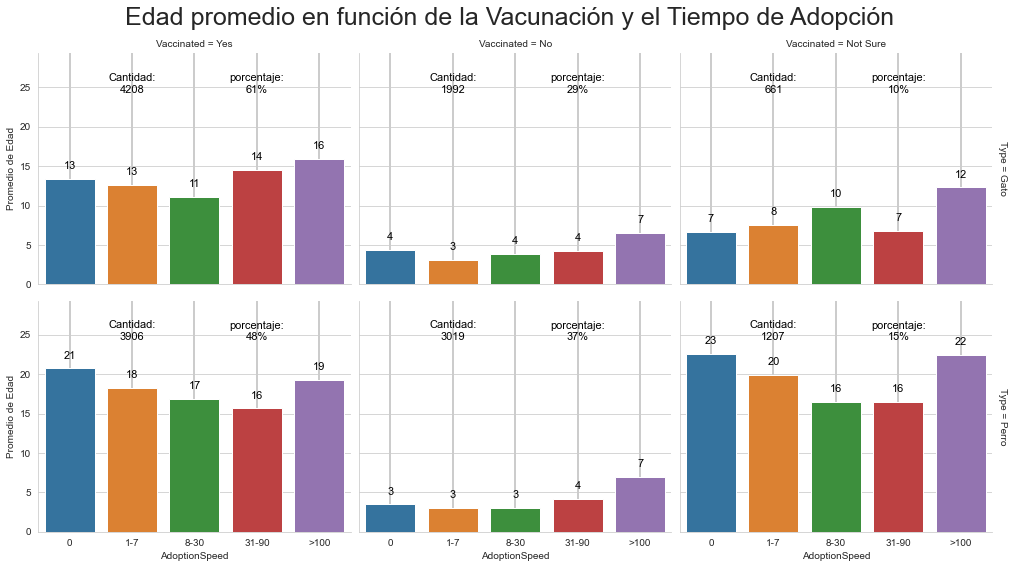

In [47]:
df_plot_25 = data_EDA.groupby(["Type", "Vaccinated", "AdoptionSpeed"])["Age"].mean().reset_index()
df_plot_26 = data_EDA.groupby(["Type"])["Vaccinated"].value_counts().reset_index()
df_plot_26["Porcentaje"] = df_plot_26["count"]/df_plot_26.groupby(["Type"])["count"].transform("sum")*100
df_plot_27 = data_EDA.groupby(["Type"])["Vaccinated"].value_counts().reset_index()
df_plot_27["Porcentaje"] = df_plot_27["count"]/df_plot_27.merge(df_plot_27.groupby(["Type"])["count"].sum(), on = "Type", how = "left")["count_y"]*100

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_25,
                  row = 'Type', col='Vaccinated',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Age', dodge = True,
                saturation = 0.7, palette = sns.color_palette(), estimator = np.mean)
g.set(ylabel = "Promedio de Edad",  ylim = (0, max(df_plot_25["Age"])*1.3))
g.fig.suptitle("Edad promedio en función de la Vacunación y el Tiempo de Adopción", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)

z = 0
for ax in g.axes.flat:
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.xaxis.set_major_locator(FixedLocator([0.5, 1.5, 2.5]))
    #ax.set_xticks([0, 1, 2])
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Cantidad:\n" + f'{df_plot_26["count"][z]:.0f}', (1, max(df_plot_25["Age"])*1.1),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("porcentaje:\n" + f'{df_plot_26["Porcentaje"][z]:.0f}%', (3, max(df_plot_25["Age"])*1.1),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    j = 0
    #for i in total_plot_5.FurLength.unique():
    #  ax.annotate("Cantidad:\n" + f'{total_plot_5["Quantity"][j + z * 3]:.0f}', (j, 75),
    #  ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
    #  textcoords='offset points')
    #  j = j + 1
    z = z + 1
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0f}', (x + width/2, y + height + 1),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')


Este es un gráfico interesante. Primero, destacar la diferencia de edad que hay entre perros y gatos. Segundo, tanto para perros como para gatos, existe una relación entre la edad y el tiempo de adopción para los que se encuentran no vacudados. Para los vacunados esto es muy diferente, ya que su promedio de edad es mucho mayor y no existe esta relación de forma marcada. Llama la atención que los perros de los que no se está seguro que hayan sido vacunados, tengan la mayor edad promedio.

### Variable Dewormed

In [2]:
df_plot_28 = data_EDA.groupby(["Type","Dewormed"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_28["Porcentaje"] = df_plot_28["count"] / df_plot_28.groupby(["Type","Dewormed"])["count"].transform("sum") * 100
df_plot_28 = df_plot_28.sort_values(["Type","Dewormed", "AdoptionSpeed"]).reset_index()
df_plot_29 = data_EDA.groupby(["Type"])["Dewormed"].value_counts().reset_index().copy()
df_plot_29["Porcentaje"] = df_plot_29["count"] / df_plot_29.groupby(["Type"])["count"].transform("sum") * 100
df_plot_29 = df_plot_29.sort_values(["Type","Dewormed"]).reset_index()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_28,
                  row = 'Type', col='Dewormed',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_28.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de si se encuentra Desparasitado", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_29["count"][z]:.0f}', (1, max(df_plot_28.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_29.Porcentaje[z]:.0f}%', (3, max(df_plot_28.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_29["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

NameError: name 'data_EDA' is not defined

Hay una mayor proporción de perros desparasitados que gatos. No se aprecia una correlación marcada entre estas variables salvo que los animales que no se pueden asegurar que estén desparasitados tienen mayores tiempos de adopción.

### Variable Sterilized

C:\Users\rodri\AppData\Local\Temp\ipykernel_316\1683923981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_30 = data_EDA.groupby(["Type","Sterilized"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_316\1683923981.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_30["Porcentaje"] = df_plot_30["count"] / df_plot_30.groupby(["Type","Sterilized"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_316\1683923981.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

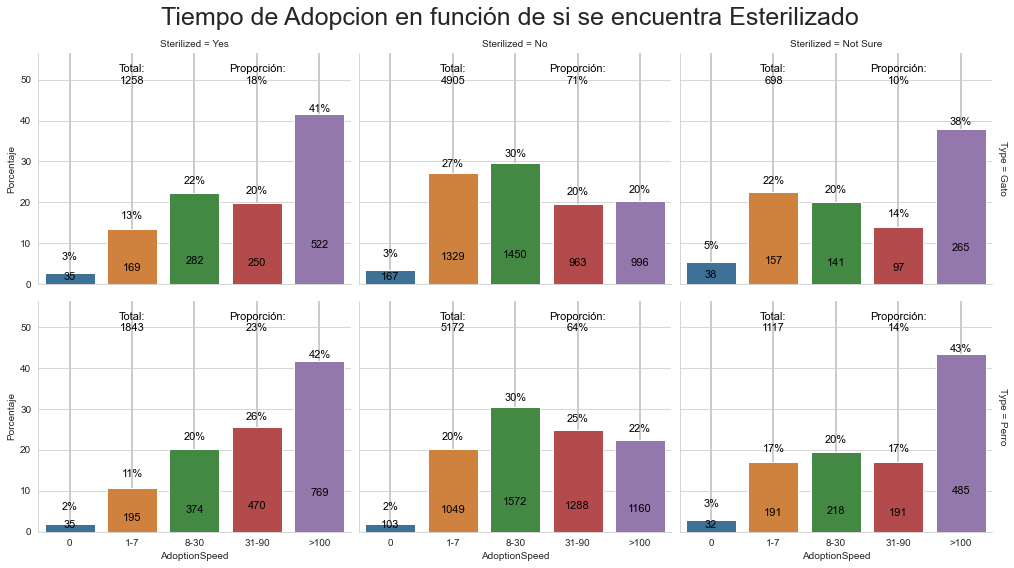

In [176]:
df_plot_30 = data_EDA.groupby(["Type","Sterilized"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_30["Porcentaje"] = df_plot_30["count"] / df_plot_30.groupby(["Type","Sterilized"])["count"].transform("sum") * 100
df_plot_30 = df_plot_30.sort_values(["Type","Sterilized", "AdoptionSpeed"]).reset_index()
df_plot_31 = data_EDA.groupby(["Type"])["Sterilized"].value_counts().reset_index().copy()
df_plot_31["Porcentaje"] = df_plot_31["count"] / df_plot_31.groupby(["Type"])["count"].transform("sum") * 100
df_plot_31 = df_plot_31.sort_values(["Type","Sterilized"]).reset_index()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_30,
                  row = 'Type', col='Sterilized',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_30.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de si se encuentra Esterilizado", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_31["count"][z]:.0f}', (1, max(df_plot_30.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_31.Porcentaje[z]:.0f}%', (3, max(df_plot_30.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_31["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

La gran mayoría de los perros y gatos no se encuentran esterilizados, sorprendentemente este grupo es el que más rápido se adopta. Tanto en los gatos como en los perros, los que más demoran en adoptarse son los animales esterilizados.

### Variable Fee

C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\1763522491.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_32 = data_EDA.groupby(["Type","Tarifa"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\1763522491.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_32["Porcentaje"] = df_plot_32["count"] / df_plot_32.groupby(["Type","Tarifa"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_19472\1763522491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecat

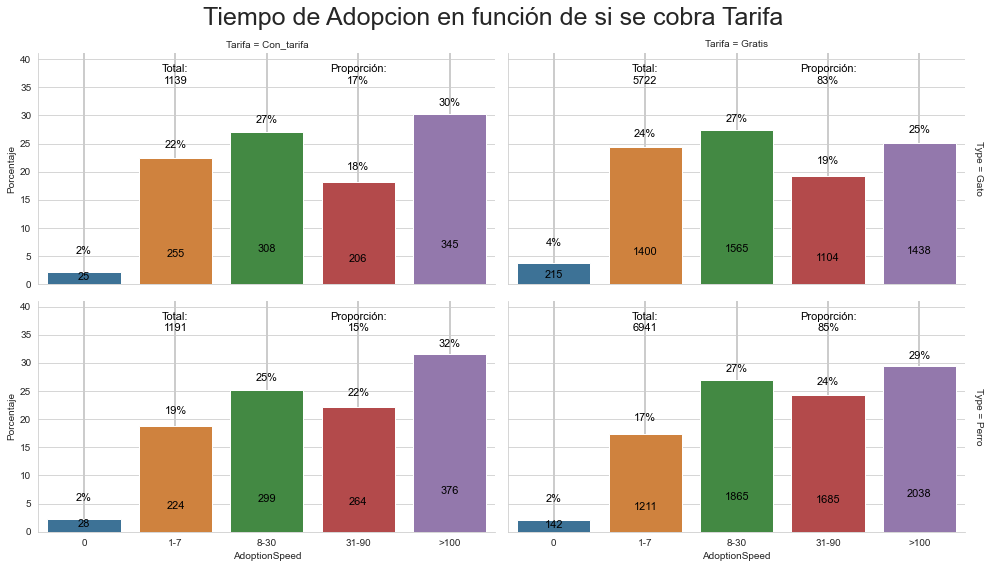

In [49]:
df_plot_32 = data_EDA.groupby(["Type","Tarifa"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_32["Porcentaje"] = df_plot_32["count"] / df_plot_32.groupby(["Type","Tarifa"])["count"].transform("sum") * 100
df_plot_32 = df_plot_32.sort_values(["Type","Tarifa", "AdoptionSpeed"]).reset_index()
df_plot_33 = data_EDA.groupby(["Type"])["Tarifa"].value_counts().reset_index().copy()
df_plot_33["Porcentaje"] = df_plot_33["count"] / df_plot_33.groupby(["Type"])["count"].transform("sum") * 100
df_plot_33 = df_plot_33.sort_values(["Type","Tarifa"]).reset_index()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_32,
                  row = 'Type', col='Tarifa',
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, max(df_plot_32.Porcentaje)*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de si se cobra Tarifa", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_33["count"][z]:.0f}', (1, max(df_plot_32.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_33.Porcentaje[z]:.0f}%', (3, max(df_plot_32.Porcentaje)*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_33["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

Tanto para perros como para gatos, el 85% de las adopciones fueron de forma gratuita. Las adopciones gratuitas tienen una mayor velocidad de adopción, aunque esto no es tan marcado como se esperaba.

C:\Users\rodri\AppData\Local\Temp\ipykernel_316\2483446827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_34 = data_EDA.groupby(["Type","Rango_tarifa"])["AdoptionSpeed"].value_counts().reset_index().copy()
C:\Users\rodri\AppData\Local\Temp\ipykernel_316\2483446827.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot_34["Porcentaje"] = df_plot_34["count"] / df_plot_34.groupby(["Type","Rango_tarifa"])["count"].transform("sum") * 100
C:\Users\rodri\AppData\Local\Temp\ipykernel_316\2483446827.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

KeyError: 0

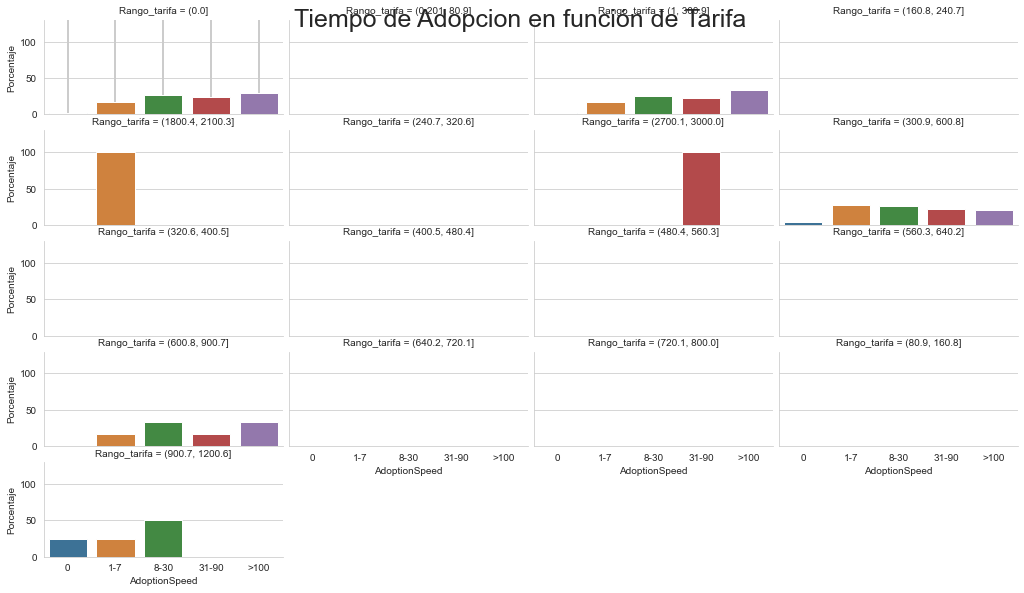

In [316]:
df_plot_34 = data_EDA.groupby(["Type","Rango_tarifa"])["AdoptionSpeed"].value_counts().reset_index().copy()
df_plot_34.loc[pd.isna(df_plot_34["count"]), "count"] = 0
df_plot_34["Porcentaje"] = df_plot_34["count"] / df_plot_34.groupby(["Type","Rango_tarifa"])["count"].transform("sum") * 100
df_plot_34 = df_plot_34.sort_values(["Type","Rango_tarifa", "AdoptionSpeed"]).reset_index()
df_plot_34.loc[pd.isna(df_plot_34["Porcentaje"]), "Porcentaje"] = 0
df_plot_35 = data_EDA.groupby(["Type"])["Rango_tarifa"].value_counts().reset_index().copy()
df_plot_35["Porcentaje"] = df_plot_35["count"] / df_plot_35.groupby(["Type"])["count"].transform("sum") * 100
df_plot_35 = df_plot_35.sort_values(["Type","Rango_tarifa"]).reset_index()

df_plot_34_perro = df_plot_34.loc[(df_plot_34["Type"] == "Perro"),].copy()
df_plot_35_perro = df_plot_35.loc[df_plot_35["Type"] == "Perro",].copy()

sns.set_style("whitegrid")

#sns.set_style(style = "ticks")
g = sns.FacetGrid(data = df_plot_34_perro,
                  col='Rango_tarifa', col_wrap=4,
                  margin_titles=True, legend_out = True, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='AdoptionSpeed', y = 'Porcentaje', dodge = True,
               saturation = 0.6, palette = sns.color_palette())

g.set(ylabel = "Porcentaje", ylim = (0, 100*1.3))
g.fig.suptitle("Tiempo de Adopcion en función de Tarifa", size = 25 )
g.tight_layout()
g.fig.set_size_inches(14, 8) 

#x_labels = data_EDA.AdoptionSpeed.unique()
#g.set(xticks=[0, 1, 2, 3, 4], xticklabels=x_labels)


for z, ax in enumerate(g.axes.flat):
    ax.grid(which = "major", linewidth = 2, axis = "x")
    #ax.set_xticklabels(data_EDA.AdoptionSpeed.unique())
    ax.annotate("Total:\n" + f'{df_plot_35_perro["count"][z]:.0f}', (1, 100*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
    ax.annotate("Proporción:\n" + f'{df_plot_35_perro.Porcentaje[z]:.0f}%', (3, 100*1.15),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
      textcoords='offset points')
   
    for w, p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height * df_plot_35_perro["count"][z] / 100):.0f}', (x + width/2, height/5),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
        ax.annotate(f'{height:.0f}%', (x + width/2, y + height + 3 - height/15),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

In [312]:
df_plot_34.head(50)

,index,Type,Rango_tarifa,AdoptionSpeed,count,Porcentaje
0,4,Gato,(0.0],0,215,3.757427
1,2,Gato,(0.0],1-7,1400,24.466970
2,0,Gato,(0.0],8-30,1565,27.350577
3,3,Gato,(0.0],31-90,1104,19.293953
4,1,Gato,(0.0],>100,1438,25.131073
5,9,Gato,"(0.201, 80.9]",0,13,2.173913
6,7,Gato,"(0.201, 80.9]",1-7,155,25.919732
7,6,Gato,"(0.201, 80.9]",8-30,157,26.254181
8,8,Gato,"(0.201, 80.9]",31-90,109,18.227425
9,5,Gato,"(0.201, 80.9]",>100,164,27.424749


In [248]:
skim(data_EDA)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 14993  │ │ category    │ 16    │ │ Type                  │                                │
│ │ Number of columns │ 27     │ │ string      │ 6     │ │ Breed1                │                                │
│ └───────────────────┴────────┘ │ int32       │ 4     │ │ Breed2                │                                │
│                                │ float64     │ 1     │ │ Gender                │                                │
│                                └─────────────┴───────┘ │ Color1                │                                │
│                                                        │ Color2                │                                │
│                                                        │ Color3                │                                │
│                                                        │ MaturitySize          │                                │
│                                                        │ FurLength             │                                │
│                                                        │ Vaccinated            │                                │
│                                                        │ Dewormed              │                                │
│                                                        │ Sterilized            │                                │
│                                                        │ Health                │                                │
│                                                        │ State                 │                                │
│                                                        │ AdoptionSpeed         │                                │
│                                                        │ Tarifa                │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Age               │    0 │       0 │       10 │      18 │    0 │     2 │     3 │    12 │    260 │    ▇     │  │
│ │ Quantity          │    0 │       0 │      1.6 │     1.5 │    1 │     1 │     1 │     1 │     20 │    ▇     │  │
│ │ Fee               │    0 │       0 │       21 │      78 │    0 │     0 │     0 │     0 │   3000 │    ▇     │  │
│ │ VideoAmt          │    0 │       0 │    0.057 │    0.35 │    0 │     0 │     0 │     0 │      8 │    ▇     │  │
│ │ PhotoAmt          │    0 │       0 │      3.9 │     3.5 │    0 │     2 │     3 │     5 │     30 │    ▇▃    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴──────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA             ┃ 

## 3. Pre-procesar Nulos
Verificar la existencia de Nulos y decidir como Imputarlos en caso de que existan

Verificar la existencia de Ceros u otros valores que puedan indicar que pueden ser perdidos

In [60]:
#casos de raza2 con valores nulos 
data.loc[(data['Breed2'] == 0), 'Breed2'] = np.nan
data[['Breed2']].isnull().sum()


Breed2    10762
dtype: int64

In [61]:
# se reemplazan por Null los casos de raza1 no definidos y raza2 definida
data.loc[(data['Breed1'] == 0) & (data['Breed2'] > 0), 'Breed1'] = np.nan
data[['Breed1']].isnull().sum()


Breed1    5
dtype: int64

In [71]:
#comprobar valores 0 en el campo Gender
data['Gender'].value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

In [70]:
#analisis de colores

#sin ningun color
data.loc[(data['Color1'] == 0) & (data['Color2'] == 0) & (data['Color3'] == 0)]

#al menos un color
print(data.loc[(data['Color1'] == 0)].shape)

#reemplazo de 0 por NaN en columnas de colores
data.loc[(data['Color2'] == 0), 'Color2'] = np.nan
data.loc[(data['Color3'] == 0), 'Color3'] = np.nan

#comprobacion de valores nulos aplicados
print(data['Color2'].isnull().sum())
print(data['Color3'].isnull().sum())


(0, 24)
4471
10604


In [72]:
#verificacion de valores nulos en columna de MatuteSize
data.MaturitySize.value_counts()

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

In [74]:
#verificacion de valores nulos en columna de FurLength
data.FurLength.value_counts()

1    8808
2    5361
3     824
Name: FurLength, dtype: int64

In [77]:
#Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
#Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
#Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

#verificacion de valores nulos en columna de FurLength
data.Vaccinated.value_counts()

#verificacion de valores nulos en columna de Dewormed
data.Dewormed.value_counts()

#verificacion de valores nulos en columna Sterilized
data.Sterilized.value_counts()


2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64

In [78]:
#verificacion de valores nulos en columna Health
data['Health'].value_counts()

1    14478
2      481
3       34
Name: Health, dtype: int64

In [79]:
#verificacion de valores en columna Quantity
data.Quantity.value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
14        2
13        2
18        1
Name: Quantity, dtype: int64

In [80]:
#verificacion de valores en columna State
data.State.value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [81]:
#Evaluacion de valores en columna AdoptionSpeed
data.AdoptionSpeed.value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

## 4. Convertir o eliminar las Columnas Categóricas

Por ejemplo, la Descripción habría que sacarla para un análisis independiente

In [85]:
data = data.drop(['Name','RescuerID','Description','PetID'], axis=1)


In [86]:
#validacion del dataset limpio (modelo 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Age            14993 non-null  int64  
 2   Breed1         14988 non-null  float64
 3   Breed2         4231 non-null   float64
 4   Gender         14993 non-null  int64  
 5   Color1         14993 non-null  int64  
 6   Color2         10522 non-null  float64
 7   Color3         4389 non-null   float64
 8   MaturitySize   14993 non-null  int64  
 9   FurLength      14993 non-null  int64  
 10  Vaccinated     14993 non-null  int64  
 11  Dewormed       14993 non-null  int64  
 12  Sterilized     14993 non-null  int64  
 13  Health         14993 non-null  int64  
 14  Quantity       14993 non-null  int64  
 15  Fee            14993 non-null  int64  
 16  State          14993 non-null  int64  
 17  VideoAmt       14993 non-null  int64  
 18  PhotoA

## 5. Normalizar o Estandarizar las variables Numericas (para los modelos que sean necesarios)

Revisar si existen valores extremos y considerarlos para los modelos que afecte

In [ ]:
#categorizacion de datos no ordinales
from sklearn.preprocessing import OrdinalEncoder

OrdinalEncoder().fit_transform(data[["Type", "Breed1", "Breed2", "Gender", "Color1", "Color2", "Color3", "Vaccinated", "Dewormed", "Sterilized", "State"]])

#variable ordinales y con valores ascendentes (revision si es correcto!!!!)
#encoder = OrdinalEncoder(categories=[[3, 2, 1], [1, 2, 3, 4], [1, 2, 3], [4, 3, 2, 1, 0]])
#encoder.fit_transform(data[["Health", "MaturitySize", "FurLength", "AdoptionSpeed"]])



## 6. Separa la base de Test (10%) y Train (90%)
Pueden ser otros porcentajes que les parezcan mejor

### 7. Para la parte de Train, armar un esquema de Cross Validation

Usar 10 Folds

## 8. Entrenar al menos un Modelo que prefieran y optimizar al menos un Hiperparámetro